# Creation of MAD-X Input tables for CERN Proton Synchrotron injection bump

## BSW Tables defining dipolar component - Eddy currents cause sextupolar component that defines a tune swing

In [34]:
import os
import numpy as np
import scipy.io as sio
from math import log10, floor

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec

In [2]:
def round_sig(x, sig=4):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [3]:
def seq_start_to_end(n_vals, start, stop):
    n_mp = n_vals
    interval = (stop-start)/(n_mp-1) 

    print('seq_start_to_end::interval = ', interval)

    positions = np.arange(start, stop+interval, interval)
    
    return positions

In [4]:
# golden values for the bump - from Eugenio Senes CERN BE-BI

# Values are for 2 * 10 cm HKICKERs per section (8 total)
# ~ bsw40              =    0.003498034648/2
# ~ bsw42              =    -0.01422287844/2
# ~ bsw43              =    0.01290524313/2
# ~ bsw44              =    -0.006001526439/2
# ~ BSS_max = 2*1.11828e-01 #from twiss

In [5]:
# Values are for 1 * 20 cm SBEND/QUAD per section (4 total) with dipole and
# sextupole component added as an error
bsw40 = -1*0.003498034648
bsw42 = -1*-0.01422287844
bsw43 = -1*0.01290524313
bsw44 = -1*-0.006001526439
BSS_max = 2*1.11828e-01 #from twiss 

In [6]:
# build the parameter sweep lists
# Split 0 -> pi into nsteps
nstep = 101.

steps = seq_start_to_end(nstep, 0., (np.pi))


#steps = np.arange(0,nstep+1,1)/nstep * np.pi/2
#steps = np.append(steps, steps+np.pi/2)

# Half the values for only bump closure
len_step = len(steps)
print len_step

('seq_start_to_end::interval = ', 0.031415926535897934)
101


In [7]:
print steps

[0.         0.03141593 0.06283185 0.09424778 0.12566371 0.15707963
 0.18849556 0.21991149 0.25132741 0.28274334 0.31415927 0.34557519
 0.37699112 0.40840704 0.43982297 0.4712389  0.50265482 0.53407075
 0.56548668 0.5969026  0.62831853 0.65973446 0.69115038 0.72256631
 0.75398224 0.78539816 0.81681409 0.84823002 0.87964594 0.91106187
 0.9424778  0.97389372 1.00530965 1.03672558 1.0681415  1.09955743
 1.13097336 1.16238928 1.19380521 1.22522113 1.25663706 1.28805299
 1.31946891 1.35088484 1.38230077 1.41371669 1.44513262 1.47654855
 1.50796447 1.5393804  1.57079633 1.60221225 1.63362818 1.66504411
 1.69646003 1.72787596 1.75929189 1.79070781 1.82212374 1.85353967
 1.88495559 1.91637152 1.94778745 1.97920337 2.0106193  2.04203522
 2.07345115 2.10486708 2.136283   2.16769893 2.19911486 2.23053078
 2.26194671 2.29336264 2.32477856 2.35619449 2.38761042 2.41902634
 2.45044227 2.4818582  2.51327412 2.54469005 2.57610598 2.6075219
 2.63893783 2.67035376 2.70176968 2.73318561 2.76460154 2.79601

In [8]:
def half_list(a_list):
	half = len(a_list)//2
	return a_list[:half], a_list[half:]

def half_list_plus_one(a_list):
	half = len(a_list)//2 - 1
	return a_list[:half], a_list[half:]

#last_half_steps = half_list_plus_one(steps)[1]
last_half_steps = seq_start_to_end(101, (np.pi/2), (np.pi))
first_half_steps = half_list(steps)[0]
#print s
print first_half_steps
print len(first_half_steps)

('seq_start_to_end::interval = ', 0.015707963267948967)
[0.         0.03141593 0.06283185 0.09424778 0.12566371 0.15707963
 0.18849556 0.21991149 0.25132741 0.28274334 0.31415927 0.34557519
 0.37699112 0.40840704 0.43982297 0.4712389  0.50265482 0.53407075
 0.56548668 0.5969026  0.62831853 0.65973446 0.69115038 0.72256631
 0.75398224 0.78539816 0.81681409 0.84823002 0.87964594 0.91106187
 0.9424778  0.97389372 1.00530965 1.03672558 1.0681415  1.09955743
 1.13097336 1.16238928 1.19380521 1.22522113 1.25663706 1.28805299
 1.31946891 1.35088484 1.38230077 1.41371669 1.44513262 1.47654855
 1.50796447 1.5393804 ]
50


In [9]:

print last_half_steps
print len(last_half_steps)

[1.57079633 1.58650429 1.60221225 1.61792022 1.63362818 1.64933614
 1.66504411 1.68075207 1.69646003 1.712168   1.72787596 1.74358392
 1.75929189 1.77499985 1.79070781 1.80641578 1.82212374 1.8378317
 1.85353967 1.86924763 1.88495559 1.90066356 1.91637152 1.93207948
 1.94778745 1.96349541 1.97920337 1.99491134 2.0106193  2.02632726
 2.04203522 2.05774319 2.07345115 2.08915911 2.10486708 2.12057504
 2.136283   2.15199097 2.16769893 2.18340689 2.19911486 2.21482282
 2.23053078 2.24623875 2.26194671 2.27765467 2.29336264 2.3090706
 2.32477856 2.34048653 2.35619449 2.37190245 2.38761042 2.40331838
 2.41902634 2.43473431 2.45044227 2.46615023 2.4818582  2.49756616
 2.51327412 2.52898209 2.54469005 2.56039801 2.57610598 2.59181394
 2.6075219  2.62322987 2.63893783 2.65464579 2.67035376 2.68606172
 2.70176968 2.71747765 2.73318561 2.74889357 2.76460154 2.7803095
 2.79601746 2.81172542 2.82743339 2.84314135 2.85884931 2.87455728
 2.89026524 2.9059732  2.92168117 2.93738913 2.95309709 2.9688050

In [10]:
# strengths for the simulation

# sextupole strength
BSS_val = BSS_max*np.cos(steps)

# dipole (kicker) strength
bsw40_val = bsw40*np.sin(steps)
bsw42_val = bsw42*np.sin(steps)
bsw43_val = bsw43*np.sin(steps)
bsw44_val = bsw44*np.sin(steps)

# sexupole strengths
bsw40_sxt = BSS_max*np.cos(steps)*(bsw40/bsw42)
bsw42_sxt = BSS_max*np.cos(steps)*(bsw42/bsw42)
bsw43_sxt = BSS_max*np.cos(steps)*(bsw43/bsw42)
bsw44_sxt = BSS_max*np.cos(steps)*(bsw44/bsw42)

## Plot 

In [32]:
plt.rcParams['figure.figsize'] = [5.0, 4.5]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10

plt.rcParams['legend.fontsize'] = 10

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5

save_folder = 'Plots/'

('seq_start_to_end::interval = ', 10.0)


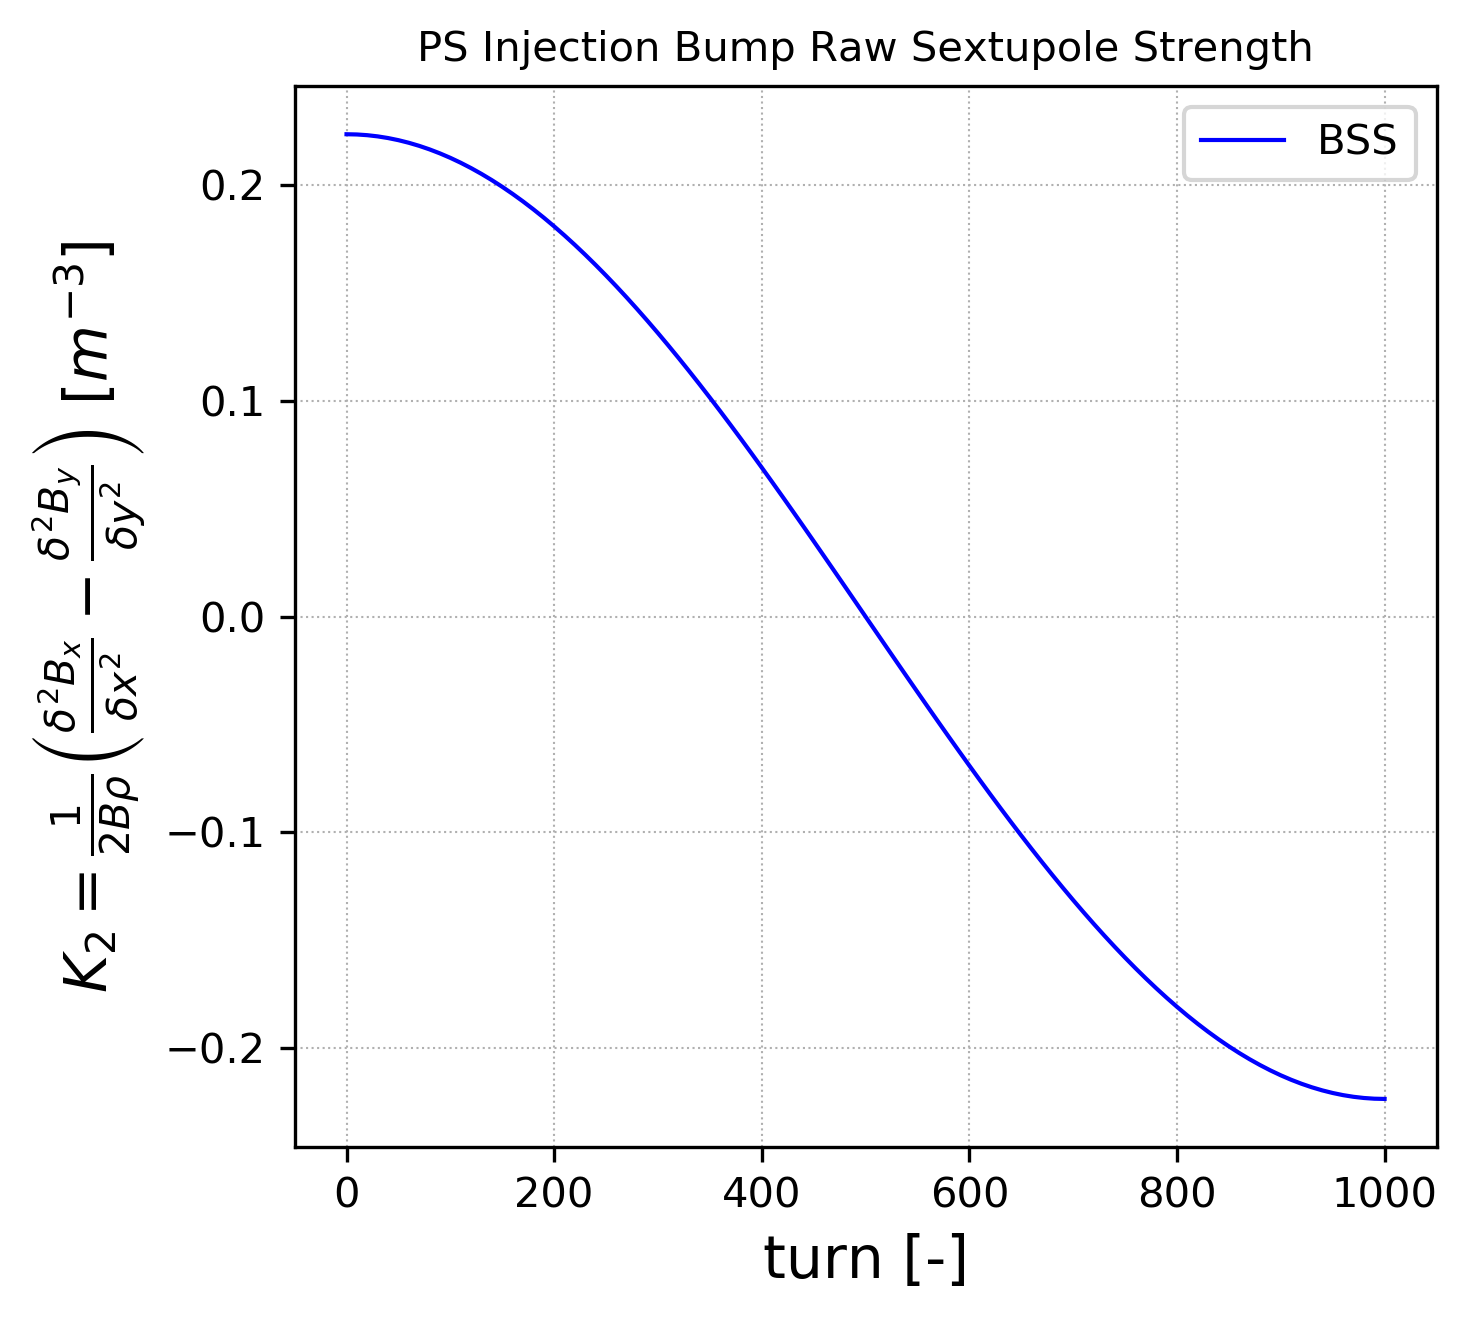

In [12]:
fig, ax1 = plt.subplots();
ax1.set_title('PS Injection Bump Raw Sextupole Strength')
savename = save_folder + 'Sext_Raw_Full.png'

x = seq_start_to_end(len(BSS_val), 0., 1000.)
ax1.plot(x, BSS_val, label='BSS', color='b');

ax1.set_xlabel('turn [-]')
ax1.set_ylabel(r'$K_2 = \frac{1}{2 B \rho} \left(\frac{\delta^2B_x}{\delta x^2} - \frac{\delta^2B_y}{\delta y^2}\right)$ [$m^{-3}$]')
    
ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

('seq_start_to_end::interval = ', 10.0)


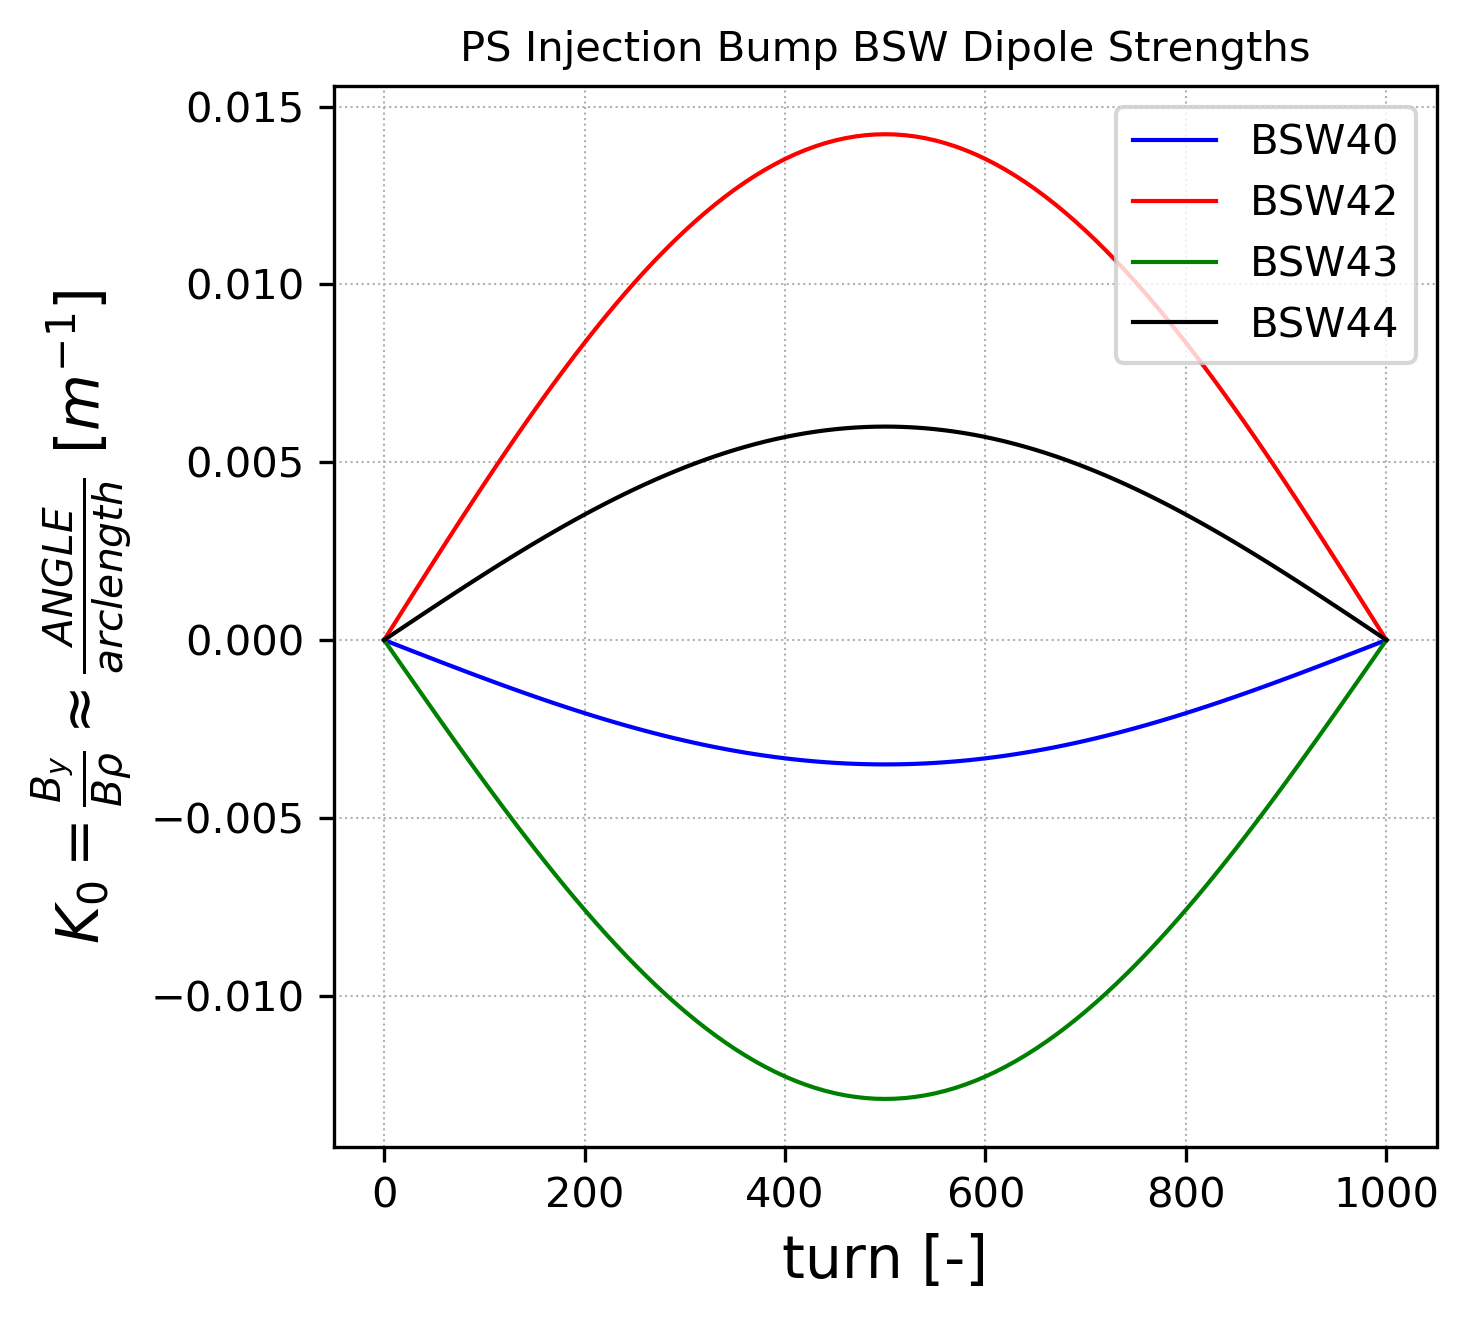

In [13]:
fig, ax1 = plt.subplots();
ax1.set_title('PS Injection Bump BSW Dipole Strengths')
savename = save_folder + 'Dipole_Full.png'

x = seq_start_to_end(len(bsw40_val), 0., 1000.)
ax1.plot(x, bsw40_val, label='BSW40', color='b');
ax1.plot(x, bsw42_val, label='BSW42', color='r');
ax1.plot(x, bsw43_val, label='BSW43', color='g');
ax1.plot(x, bsw44_val, label='BSW44', color='k');

ax1.set_xlabel('turn [-]')
ax1.set_ylabel(r'$K_0 = \frac{B_y}{B \rho} \approx \frac{ANGLE}{arclength}$ [$m^{-1}$]')
    
ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

('seq_start_to_end::interval = ', 10.0)


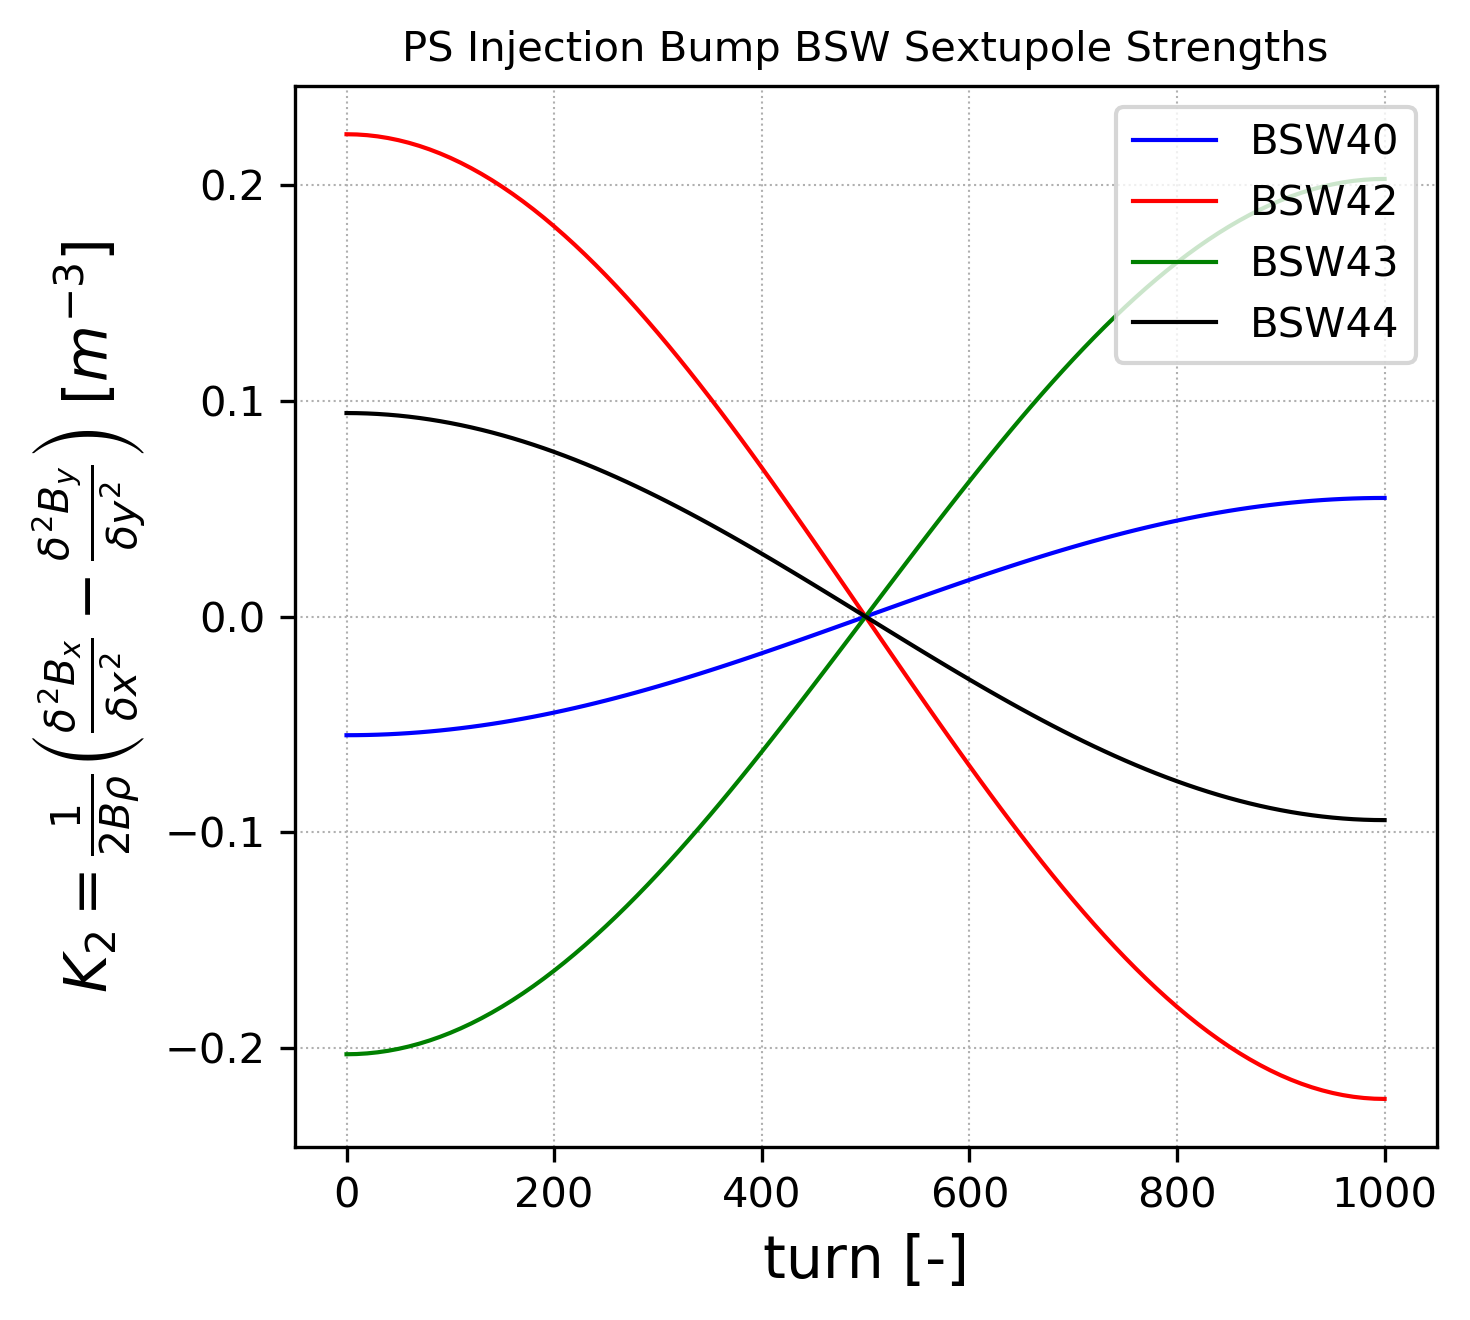

In [14]:
fig, ax1 = plt.subplots();
ax1.set_title('PS Injection Bump BSW Sextupole Strengths')
savename = save_folder + 'Sextupole_Full.png'

x = seq_start_to_end(len(bsw40_val), 0., 1000.)
ax1.plot(x, bsw40_sxt, label='BSW40', color='b');
ax1.plot(x, bsw42_sxt, label='BSW42', color='r');
ax1.plot(x, bsw43_sxt, label='BSW43', color='g');
ax1.plot(x, bsw44_sxt, label='BSW44', color='k');

ax1.set_xlabel('turn [-]')
ax1.set_ylabel(r'$K_2 = \frac{1}{2 B \rho} \left(\frac{\delta^2B_x}{\delta x^2} - \frac{\delta^2B_y}{\delta y^2}\right)$ [$m^{-3}$]')
   
ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

## Injection is at 500 ms - for PyORBIT sims we only want the bump closure

In [15]:
# strengths for the simulation - bump closre

# sextupole strength
BSS_val = BSS_max*np.cos(last_half_steps)

# dipole (kicker) strength
bsw40_val_closure = bsw40*np.sin(last_half_steps)
bsw42_val_closure = bsw42*np.sin(last_half_steps)
bsw43_val_closure = bsw43*np.sin(last_half_steps)
bsw44_val_closure = bsw44*np.sin(last_half_steps)

# sexupole strengths
bsw40_sxt_closure = BSS_val*np.cos(last_half_steps)*(bsw40/bsw42)
bsw42_sxt_closure = BSS_val*np.cos(last_half_steps)*(bsw42/bsw42)
bsw43_sxt_closure = BSS_val*np.cos(last_half_steps)*(bsw43/bsw42)
bsw44_sxt_closure = BSS_val*np.cos(last_half_steps)*(bsw44/bsw42)

In [16]:
len(bsw40_val_closure)

101

In [17]:

x = seq_start_to_end(90, 500, 1000)
len(x)

('seq_start_to_end::interval = ', 5)


101

('seq_start_to_end::interval = ', 5.0)


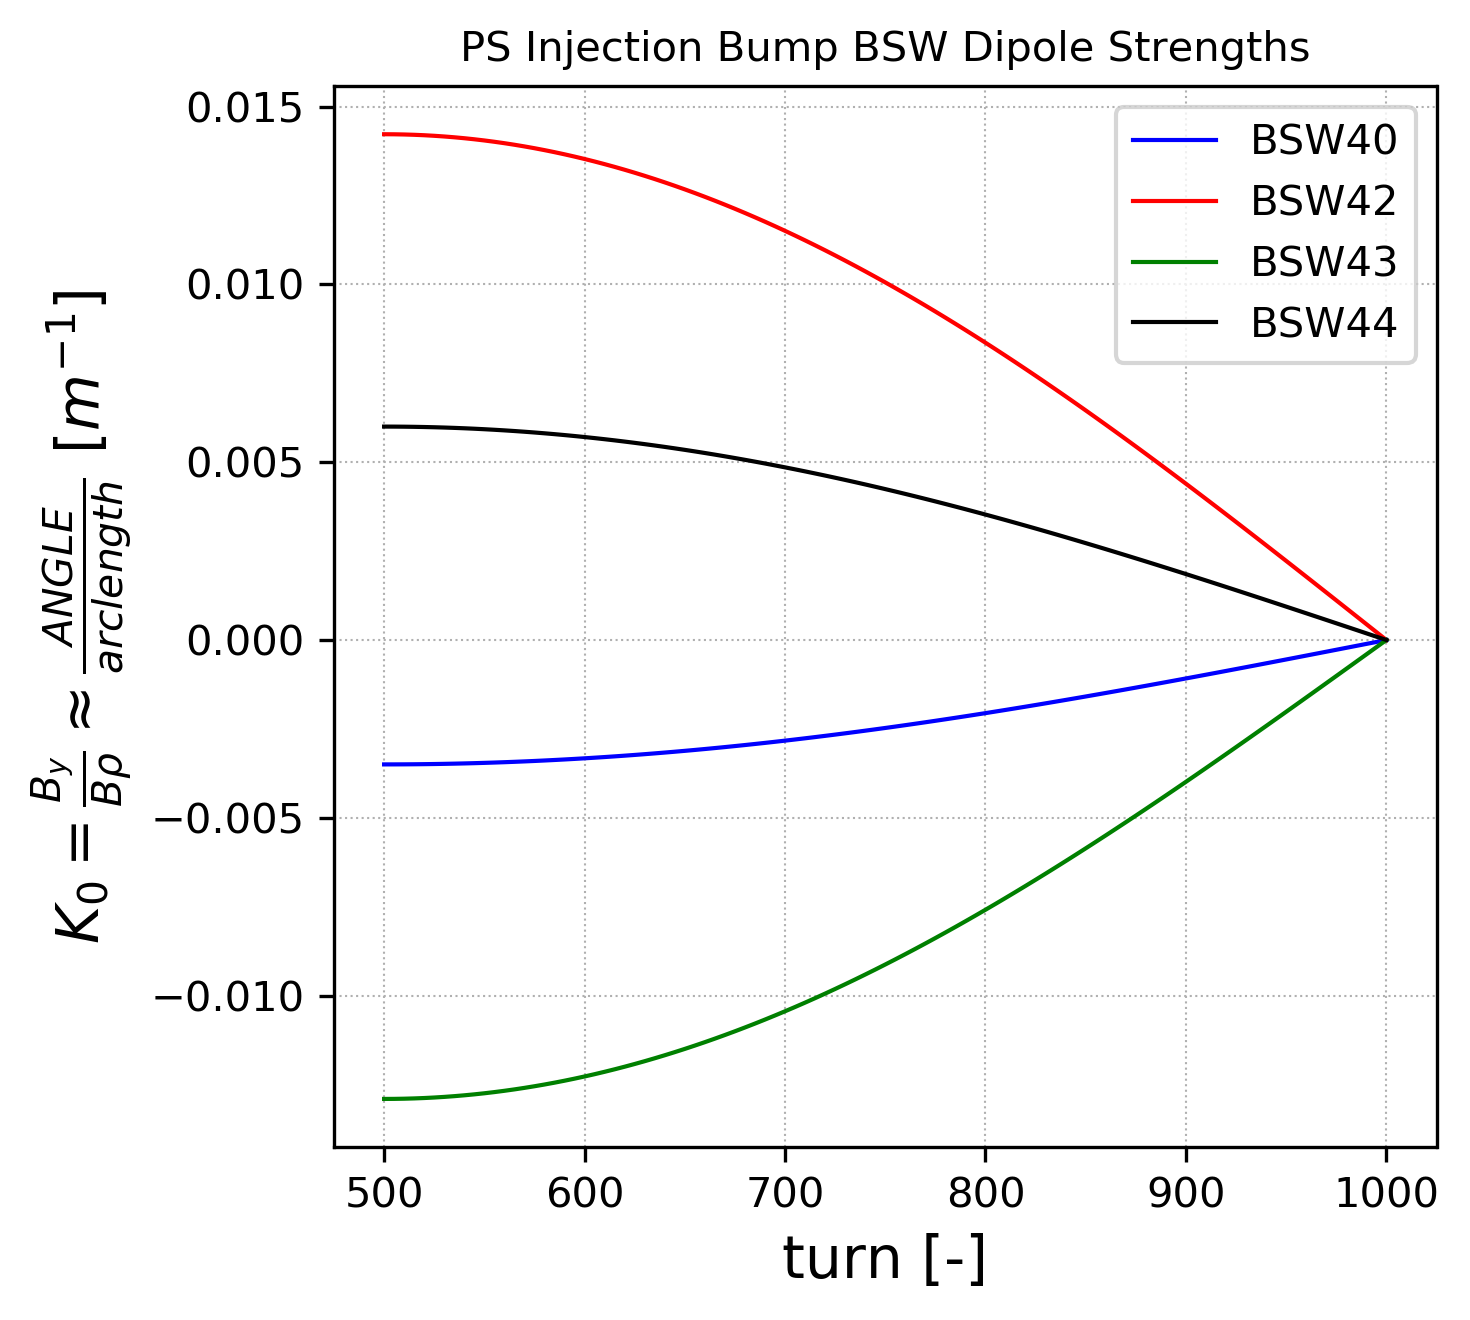

In [18]:
fig, ax1 = plt.subplots();
ax1.set_title('PS Injection Bump BSW Dipole Strengths')
savename = save_folder + 'Dipole_Half.png'

x = seq_start_to_end(len(bsw40_val_closure), 500., 1000.)
ax1.plot(x, bsw40_val_closure, label='BSW40', color='b');
ax1.plot(x, bsw42_val_closure, label='BSW42', color='r');
ax1.plot(x, bsw43_val_closure, label='BSW43', color='g');
ax1.plot(x, bsw44_val_closure, label='BSW44', color='k');

ax1.set_xlabel('turn [-]')
ax1.set_ylabel(r'$K_0 = \frac{B_y}{B \rho} \approx \frac{ANGLE}{arclength}$ [$m^{-1}$]')
    
ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

('seq_start_to_end::interval = ', 5.0)


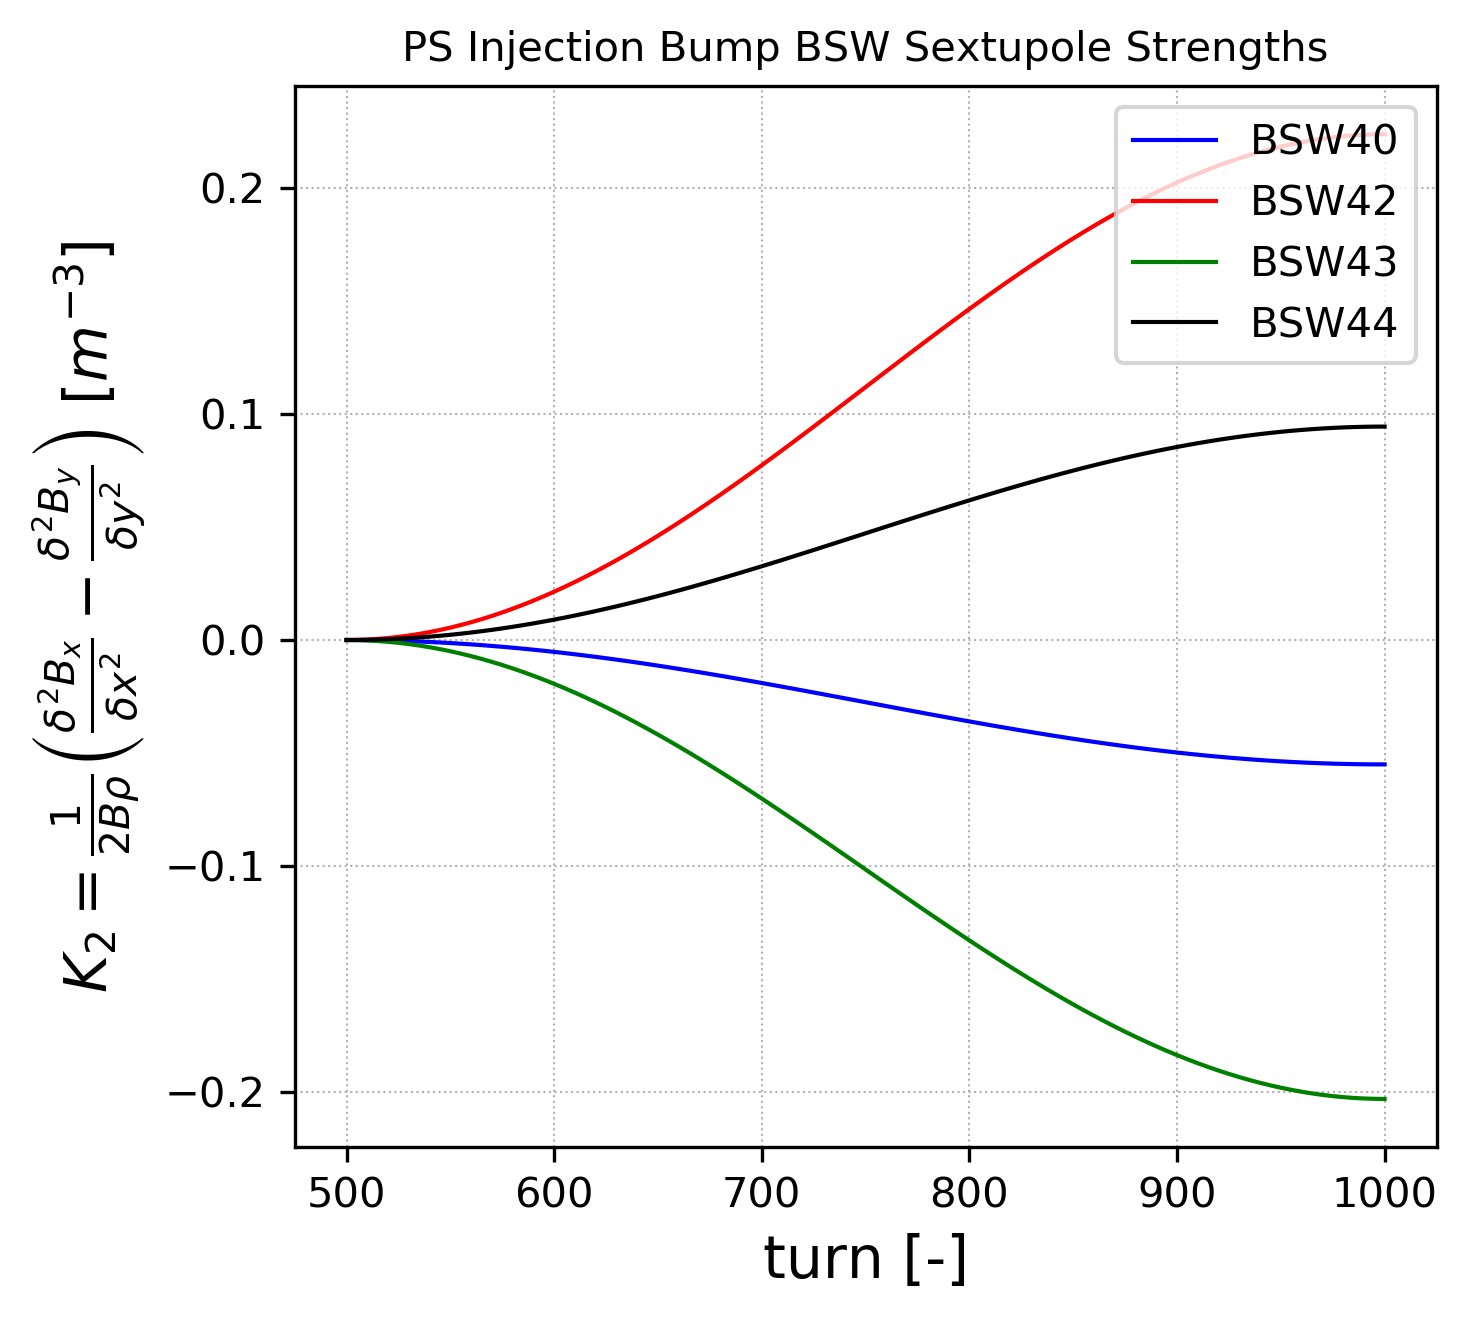

In [19]:
fig, ax1 = plt.subplots();
ax1.set_title('PS Injection Bump BSW Sextupole Strengths')
savename = save_folder + 'Sextupole_Half.png'

x = seq_start_to_end(len(bsw40_val_closure), 500., 1000.)
ax1.plot(x, bsw40_sxt_closure, label='BSW40', color='b');
ax1.plot(x, bsw42_sxt_closure, label='BSW42', color='r');
ax1.plot(x, bsw43_sxt_closure, label='BSW43', color='g');
ax1.plot(x, bsw44_sxt_closure, label='BSW44', color='k');

ax1.set_xlabel('turn [-]')
ax1.set_ylabel(r'$K_2 = \frac{1}{2 B \rho} \left(\frac{\delta^2B_x}{\delta x^2} - \frac{\delta^2B_y}{\delta y^2}\right)$ [$m^{-3}$]')

ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

##  Write to file

In [31]:
write_file = True
half_bump = True

if half_bump:
    output_file = "BSEXT_Bump_SBEND_Half.tfs"
else:
    output_file = "BSEXT_Bump_SBEND_Full.tfs"
    
if write_file:
    f = open(output_file,"w")

    # MADX
    #-BSStren*(BSW40/BSW42)
    # Equivalent
    #-BSS_val[t]*(bsw40*np.sin(t) / bsw42*np.sin(t))

    # We want a table, with K2 columns, one for each sextupole (4)
    # 9 spaces before and between each column
    # with header something like:
    header = "@ NAME             %08s \"BSWTABLE\"\n@ TYPE             %04s \"USER\"\n@ TITLE            %03s \"BSW\"\n@ ORIGIN           %16s \"5.04.02 Linux 64\"\n@ DATE             %08s \"11/04/20\"\n@ TIME             %08s \"12.00.00\"\n"

    f.write(header)
    f.write('*'+' '.join(map(lambda i: i.rjust(18), ['BSEXT_T', 'BSS', 'BSW40_K0', 'BSW42_K0', 'BSW43_K0', 'BSW44_K0'])) + '\n')
    f.write('$'+' '.join(map(lambda i: i.rjust(18), ['%le', '%le', '%le', '%le','%le', '%le'])) + '\n')

    if half_bump:         
        x = seq_start_to_end(len(last_half_steps), 0., 500.)
        for i in xrange(0,len(last_half_steps)):
            f.write(' '+' '.join(map(lambda i: ('%1.4e'%i).rjust(18), [x[i], BSS_max*np.cos(last_half_steps[i]), bsw40*np.sin(last_half_steps[i]), bsw42*np.sin(last_half_steps[i]), bsw43*np.sin(last_half_steps[i]), bsw44*np.sin(last_half_steps[i])])) + '\n')

    else:
        x = seq_start_to_end(len(steps), 0., 1000.)
        for i in xrange(0,len(steps)):
            f.write(' '+' '.join(map(lambda i: ('%1.4e'%i).rjust(18), [x[i], BSS_max*np.cos(steps[i]), bsw40*np.sin(steps[i]), bsw42*np.sin(steps[i]), bsw43*np.sin(steps[i]), bsw44*np.sin(steps[i])])) + '\n')




('seq_start_to_end::interval = ', 5.0)


# Run the last section twice and check output file (sometimes incomplete) 

# Digression on calculating turn time

In [4]:
def LorentzGamma(E_tot, E_rest=938.27208816E6):
    return (E_tot / E_rest)
    
def LorentzGamma_from_beta(beta):
    return (1./np.sqrt(1.-beta**2))    

def LorentzBeta(gamma):
    return np.sqrt( 1. - (1./gamma**2) )

def RelativisticMomentum(gamma, E_rest=938.27208816E6):
    return (gamma * E_rest * LorentzBeta(gamma))

def z_to_time(z, beta): 
    c = 299792458
    return z / (c * beta)
    
def E_from_gamma(gamma, E_rest=938.27208816E6):
    return (gamma*E_rest)

In [5]:
# Relativistic Lorentz Factors (valid for protons)
# PSB Params:
# 50 MeV    gamma =  1.0533     beta = 0.314    SC_Tuneshift ~ 2.87 #obvs not
# 160 MeV   gamma =  1.1706     beta = 0.5198   SC_Tuneshift ~ 1.4 #obvs not
#
# PS Params:
# 1.4 GeV   gamma = 2.4921      beta = 0.91596  SC_Tuneshift ~ 0.176
# 2.0 GeV   gamma = 3.1316      beta = 0.9476   SC_Tuneshift ~ 0.108

In [93]:
#1.4 GeV
circumference = 2* np.pi * 100
E_tot_1p4 = (1.4E9 + 938.27208816E6)
gamma_1p4 = LorentzGamma(E_tot_1p4)
beta_1p4 = LorentzBeta(gamma_1p4)
gamma_circumference_1p4 = circumference /gamma_1p4
turn_time = circumference / (beta_1p4 * 299792458)

print '1.4 GeV: \n\tgamma = ', round_sig(gamma_1p4), '\n\tbeta = ', round_sig(beta_1p4)
print '\tCircumference = ', round_sig(circumference,5), ' m'
print '\tGamma Circumference = ', round_sig(gamma_circumference_1p4,5), ' m'
print '\tTurn time = ', round_sig(turn_time), ' s'
print '\t875 turns = ', round_sig((turn_time*875)*1E3), ' ms'
print '\t1000 turns = ', round_sig((turn_time*1000)*1E3), ' ms'

1.4 GeV: 
	gamma =  2.492 
	beta =  0.916
	Circumference =  628.32  m
	Gamma Circumference =  252.12  m
	Turn time =  2.288e-06  s
	875 turns =  2.002  ms
	1000 turns =  2.288  ms


In [7]:
#2.0 GeV
circumference = 2* np.pi * 100
E_tot_2 = (2.01E9 + 938.27208816E6)
gamma_2 = LorentzGamma(E_tot_2)
beta_2 = LorentzBeta(gamma_2)
gamma_circumference_2 = circumference /gamma_2
turn_time_2 = circumference / (beta_2 * 299792458)

print '2.0 GeV: \n\tgamma = ', round_sig(gamma_2), '\n\tbeta = ', round_sig(beta_2)
print '\tCircumference = ', round_sig(circumference,5), ' m'
print '\tGamma Circumference = ', round_sig(gamma_circumference_2,5), ' m'
print '\tTurn time = ', round_sig(turn_time_2), ' s'
print '\t875 turns = ', round_sig((turn_time_2*875)*1E3), ' ms'
print '\t1000 turns = ', round_sig((turn_time_2*1000)*1E3), ' ms'
print '\t2200 turns = ', round_sig((turn_time_2*2200)*1E3), ' ms'

2.0 GeV: 
	gamma =  3.142 
	beta =  0.948
	Circumference =  628.32  m
	Gamma Circumference =  199.96  m
	Turn time =  2.211e-06  s
	875 turns =  1.934  ms
	1000 turns =  2.211  ms
	2200 turns =  4.864  ms


# Load MAD-X TUNES.ptc output file to check result

In [8]:
def Read_PTC_Twiss_Return_Dict(filename, first_keyword = 'BSEXT_T', verbose=True):
    # Dictionary for output
    d = dict()
    d['HEADER_FILENAME'] = filename
    keywords = ''
    
    # First we open and count header lines
    fin0=open(filename,'r').readlines()
    headerlines = 0
    for l in fin0:
        # Store each header line
        headerlines = headerlines + 1
        # Stop if we find the line starting '* NAME'
        if first_keyword in l:
            keywords = l
            break
        # Store the headers as d['HEADER_<name>'] = <value>
        else:
            #try:
            #    d[str('HEADER_'+l.split()[1])]=[float(l.split()[-1])]     
            #except ValueError:
            #    d[str('HEADER_'+l.split()[1])]=[str(l.split()[-1])]   
            if '"' in l:
                d[str('HEADER_'+l.split()[1])]=[str(l.split('"')[1])]
            else:
                d[str('HEADER_'+l.split()[1])]=[float(l.split()[-1])]                 
    headerlines = headerlines + 1    
    
    if verbose: print '\nRead_PTC_Twiss_Return_Dict found Keywords: \n',keywords
    
    # Make a list of column keywords to return (as an aid to iterating)
    dict_keys = []
    for key in keywords.split():
        dict_keys.append(key)
    dict_keys.remove('*')
    
    if verbose: print '\nRead_PTC_Twiss_Return_Dict Dict Keys: \n',dict_keys
    
    # Initialise empty dictionary entries for column keywords 
    for key in dict_keys:
        d[key]=[]
        
    if verbose: print '\nRead_PTC_Twiss_Return_Dict header only dictionary \n', d
    
    # Strip header
    fin1=open(filename,'r').readlines()[headerlines:]   
    
    # Populate the dictionary line by line
    for l in fin1:
        i = -1        
        for value in l.split():
            i = i+1
            if 'NAME' in dict_keys[i]:
                d[dict_keys[i]].append(str(value))
            else:
                d[dict_keys[i]].append(float(value))    
                
    # Return list of column keywords 'dict_keys', and dictionary 'd'
    return dict_keys, d

In [9]:
Tune_keys, TUNES = Read_PTC_Twiss_Return_Dict('../13_Full_Bump/MADX_Tables/TUNES.tfs')


Read_PTC_Twiss_Return_Dict found Keywords: 
*      BSEXT_T          QX0          QY0           QX           QY         XMAX         XMIN 


Read_PTC_Twiss_Return_Dict Dict Keys: 
['BSEXT_T', 'QX0', 'QY0', 'QX', 'QY', 'XMAX', 'XMIN']

Read_PTC_Twiss_Return_Dict header only dictionary 
{'HEADER_NAME': ['TUNES'], 'XMAX': [], 'HEADER_TIME': ['18.41.06'], 'QY': [], 'BSEXT_T': [], 'QY0': [], 'HEADER_TYPE': ['USER'], 'QX0': [], 'HEADER_DATE': ['07/05/20'], 'HEADER_FILENAME': '../13_Full_Bump/MADX_Tables/TUNES.tfs', 'QX': [], 'XMIN': [], 'HEADER_TITLE': ['Flat file generation for PTC-PyORBIT'], 'HEADER_ORIGIN': ['MAD-X 5.02.00 Linux 64']}


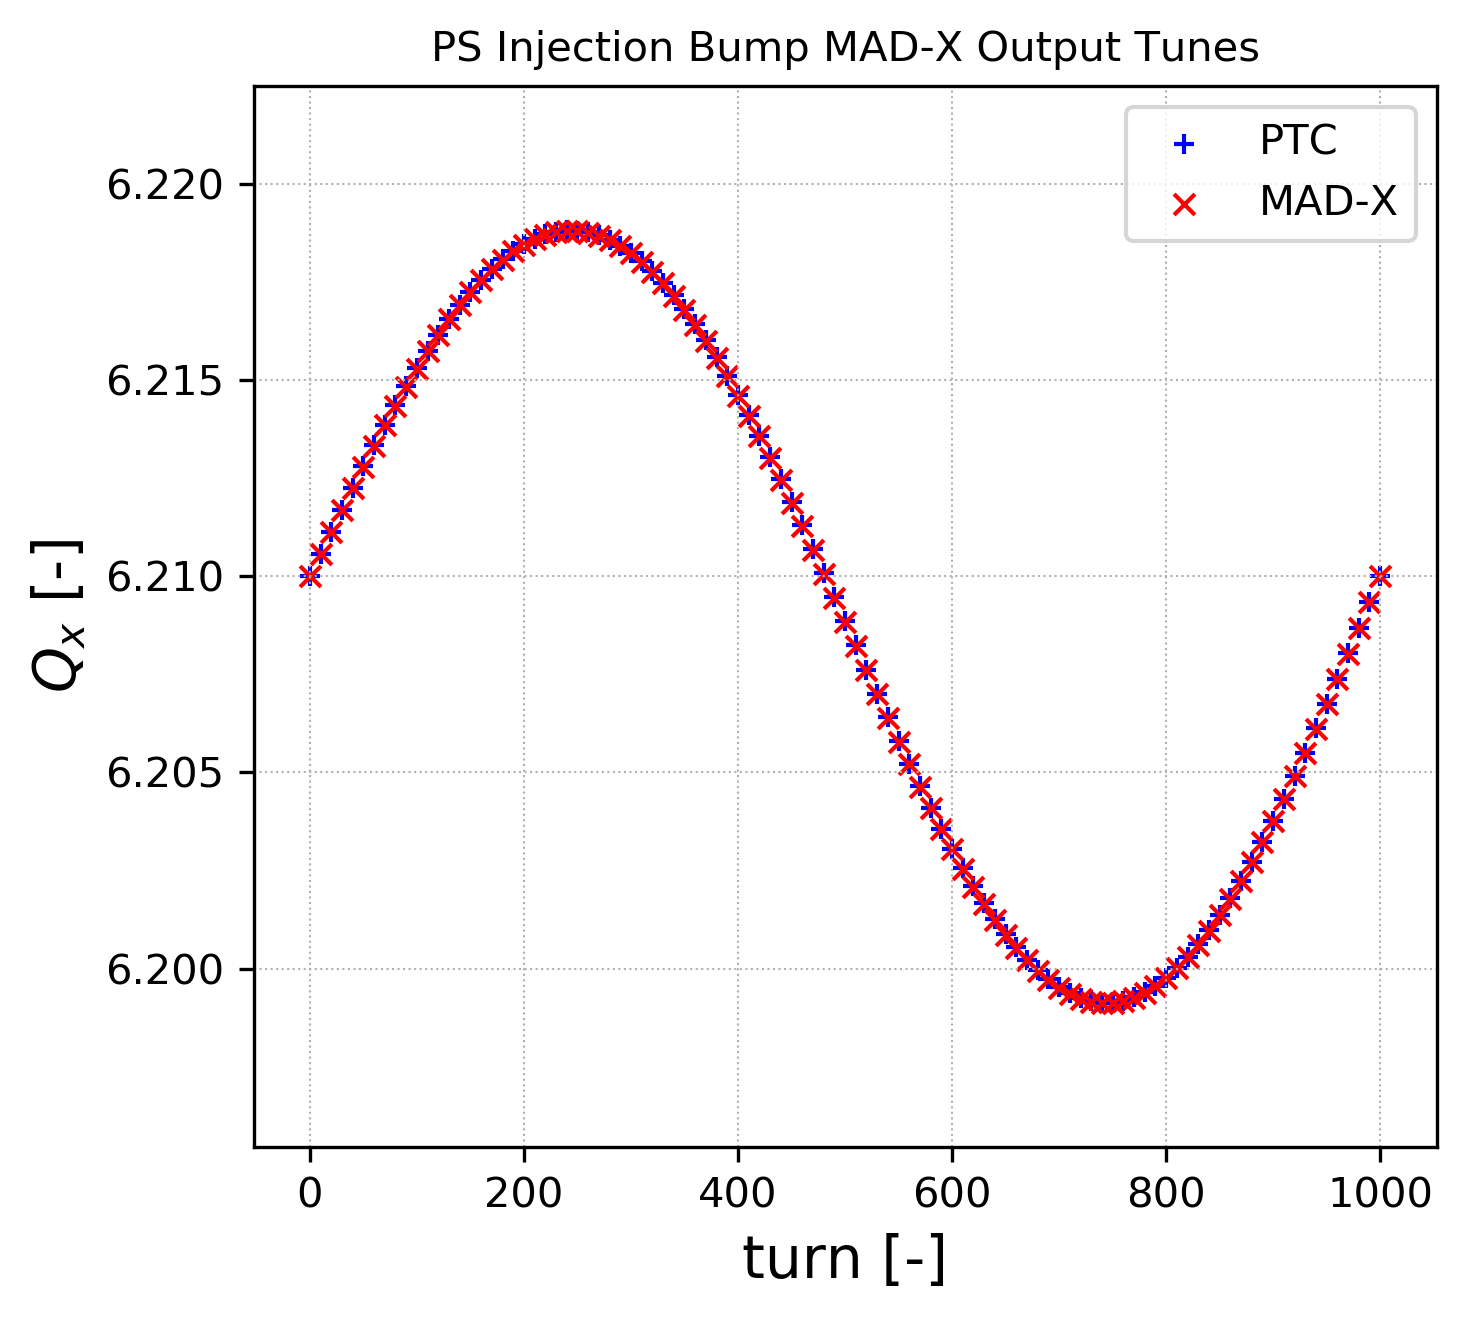

In [12]:
fig, ax1 = plt.subplots();
ax1.set_title('PS Injection Bump MAD-X Output Tunes')
savename = save_folder + 'MADX_QX_Full.png'

PTC_qx = np.array(TUNES['QX0'])

ax1.scatter(TUNES['BSEXT_T'], PTC_qx+6., label='PTC', color='b', marker = '+');
ax1.scatter(TUNES['BSEXT_T'], TUNES['QX'], label='MAD-X', color='r', marker = 'x');

ax1.set_xlabel('turn [-]')
ax1.set_ylabel(r'$Q_{x}$ [-]')

ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

#  We expect a tune swing with amplitude ~ 0.01 in tune

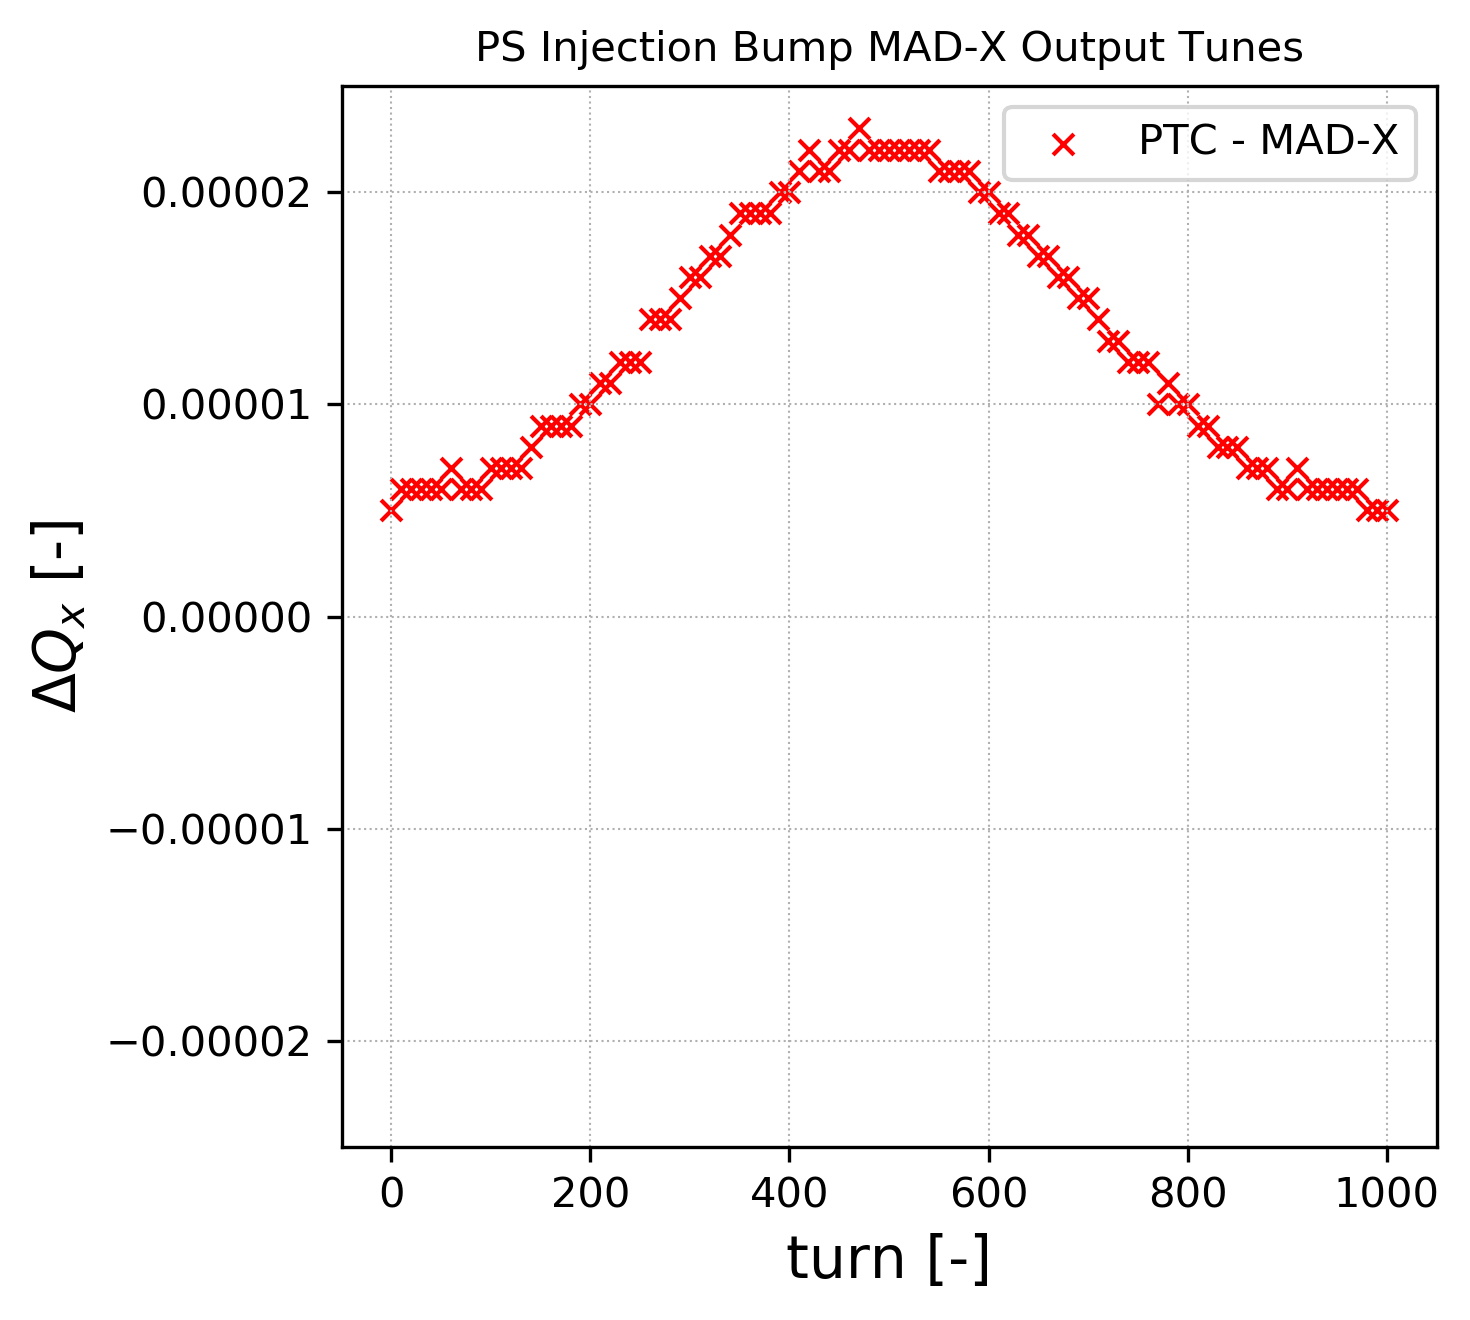

In [13]:
fig, ax1 = plt.subplots();
ax1.set_title('PS Injection Bump MAD-X Output Tunes')
savename = save_folder + 'MADX_QY_Full.png'

PTC_qy = np.array(TUNES['QX0'])

ax1.scatter(TUNES['BSEXT_T'], (PTC_qy+6.-TUNES['QX']), label='PTC - MAD-X', color='r', marker = 'x');

ax1.set_xlabel('turn [-]')
ax1.set_ylabel(r'$\Delta Q_{x}$ [-]')

ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)
ax1.set_ylim(-0.000025, 0.000025)

plt.tight_layout()
#fig.savefig(savename)

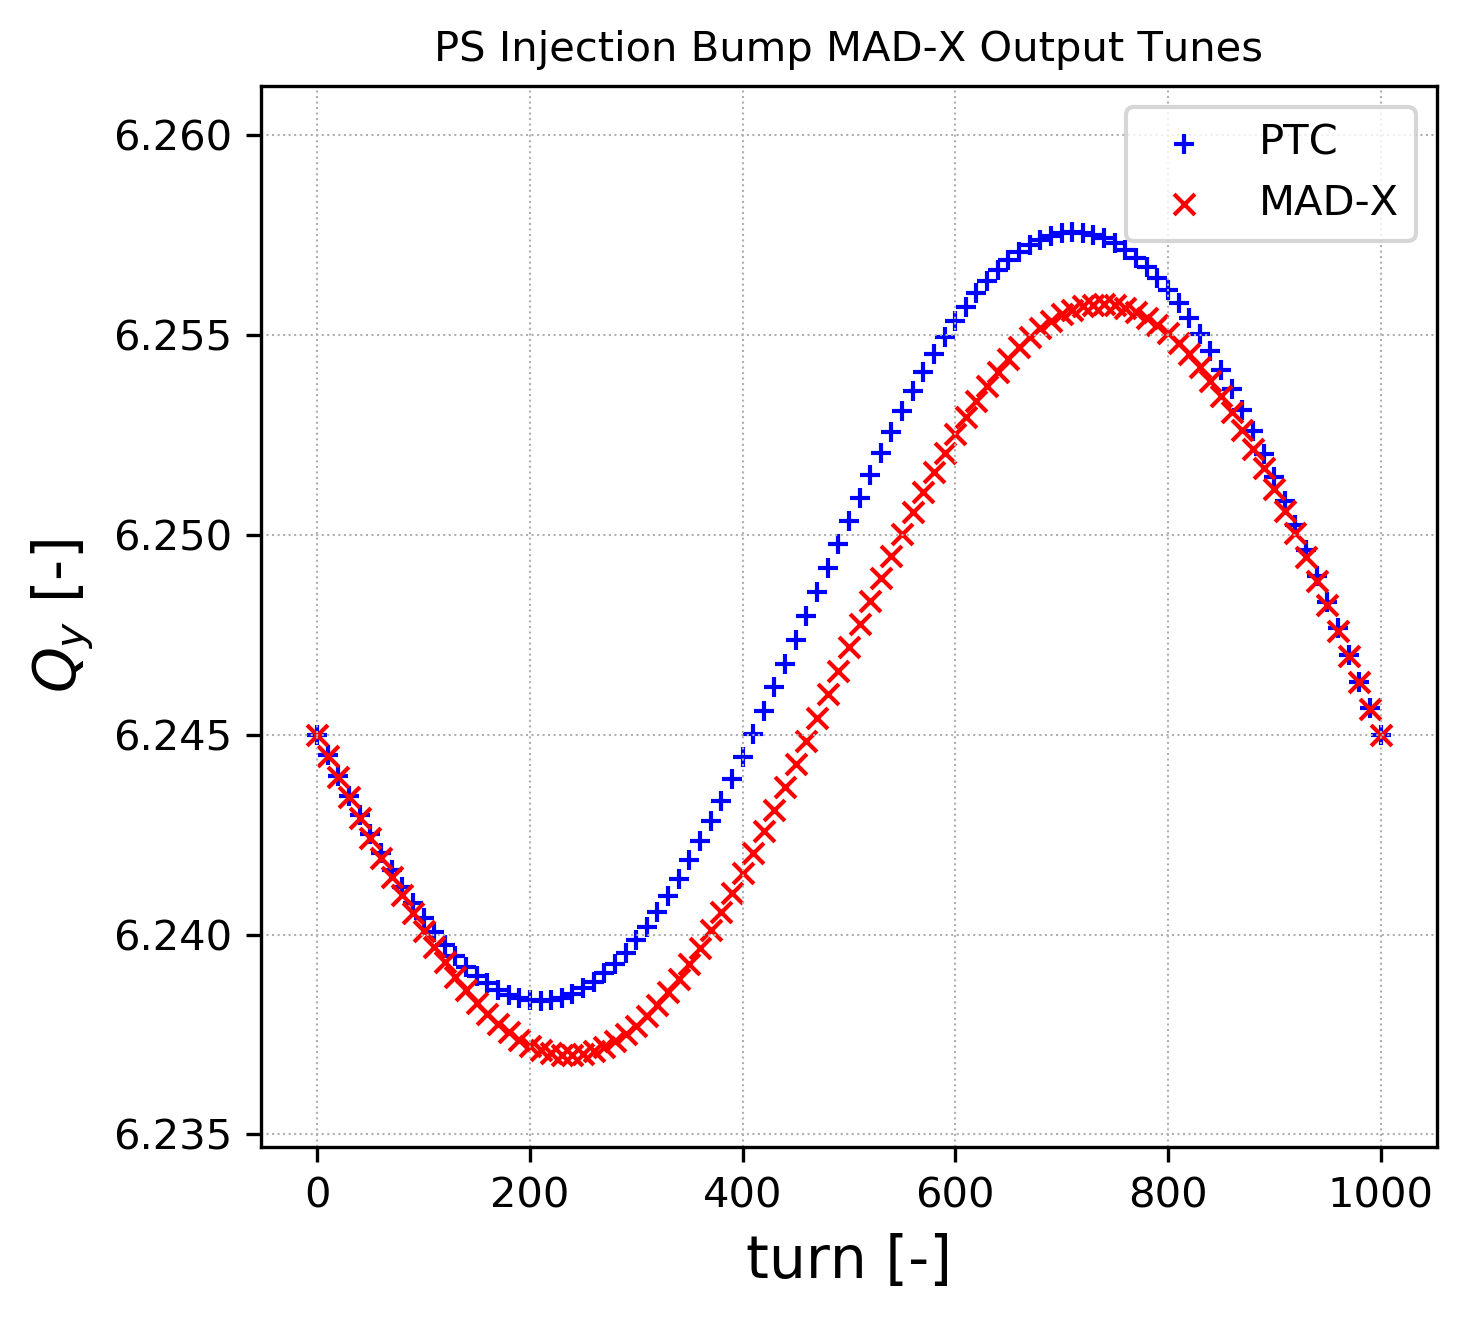

In [14]:
fig, ax1 = plt.subplots();
ax1.set_title('PS Injection Bump MAD-X Output Tunes')
savename = save_folder + 'MADX_QY_Full.png'

PTC_qy = np.array(TUNES['QY0'])

ax1.scatter(TUNES['BSEXT_T'], PTC_qy+6., label='PTC', color='b', marker = '+');
ax1.scatter(TUNES['BSEXT_T'], TUNES['QY'], label='MAD-X', color='r', marker = 'x');

ax1.set_xlabel('turn [-]')
ax1.set_ylabel(r'$Q_{y}$ [-]')

ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

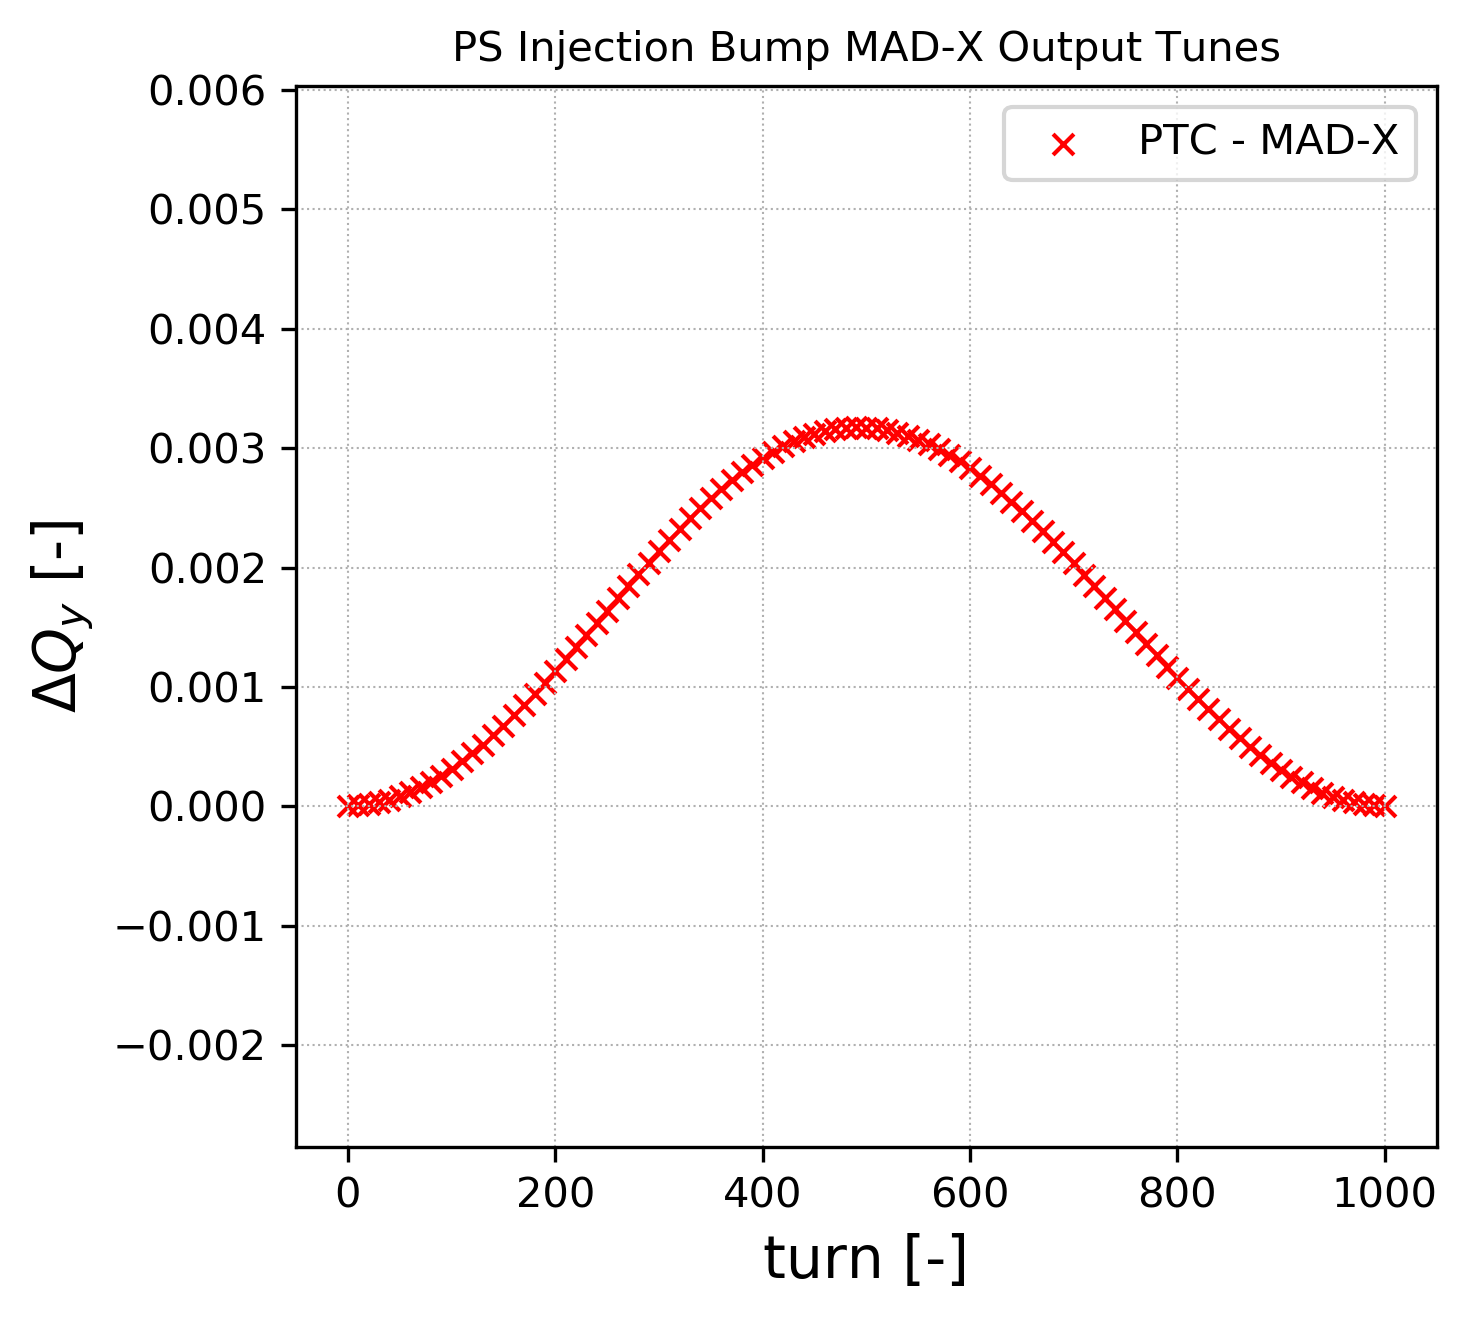

In [15]:
fig, ax1 = plt.subplots();
ax1.set_title('PS Injection Bump MAD-X Output Tunes')
savename = save_folder + 'MADX_QY_Full.png'

PTC_qy = np.array(TUNES['QY0'])

ax1.scatter(TUNES['BSEXT_T'], (PTC_qy+6.-TUNES['QY']), label='PTC - MAD-X', color='r', marker = 'x');

ax1.set_xlabel('turn [-]')
ax1.set_ylabel(r'$\Delta Q_{y}$ [-]')

ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
#fig.savefig(savename)

In [ ]:
fig, ax1 = plt.subplots();
ax1.set_title('PS Injection Bump MAD-X Output Closed Orbit Maxima')
savename = save_folder + 'MADX_COMax_Full.png'


ax1.scatter(TUNES['BSEXT_T'], TUNES['XMAX'], color='b', marker = '+');

ax1.set_xlabel('turn [-]')
ax1.set_ylabel('Closed Orbit MAximum [m]')

#ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

# Load half bump output

In [18]:
Half_Tune_keys, HTUNES = Read_PTC_Twiss_Return_Dict('../12_Half_Bump/MADX_Tables/TUNES.tfs')


Read_PTC_Twiss_Return_Dict found Keywords: 
*      BSEXT_T          QX0          QY0           QX           QY         XMAX         XMIN 


Read_PTC_Twiss_Return_Dict Dict Keys: 
['BSEXT_T', 'QX0', 'QY0', 'QX', 'QY', 'XMAX', 'XMIN']

Read_PTC_Twiss_Return_Dict header only dictionary 
{'HEADER_NAME': ['TUNES'], 'XMAX': [], 'HEADER_TIME': ['18.08.02'], 'QY': [], 'BSEXT_T': [], 'QY0': [], 'HEADER_TYPE': ['USER'], 'QX0': [], 'HEADER_DATE': ['07/05/20'], 'HEADER_FILENAME': '../12_Half_Bump/MADX_Tables/TUNES.tfs', 'QX': [], 'XMIN': [], 'HEADER_TITLE': ['Flat file generation for PTC-PyORBIT'], 'HEADER_ORIGIN': ['MAD-X 5.02.00 Linux 64']}


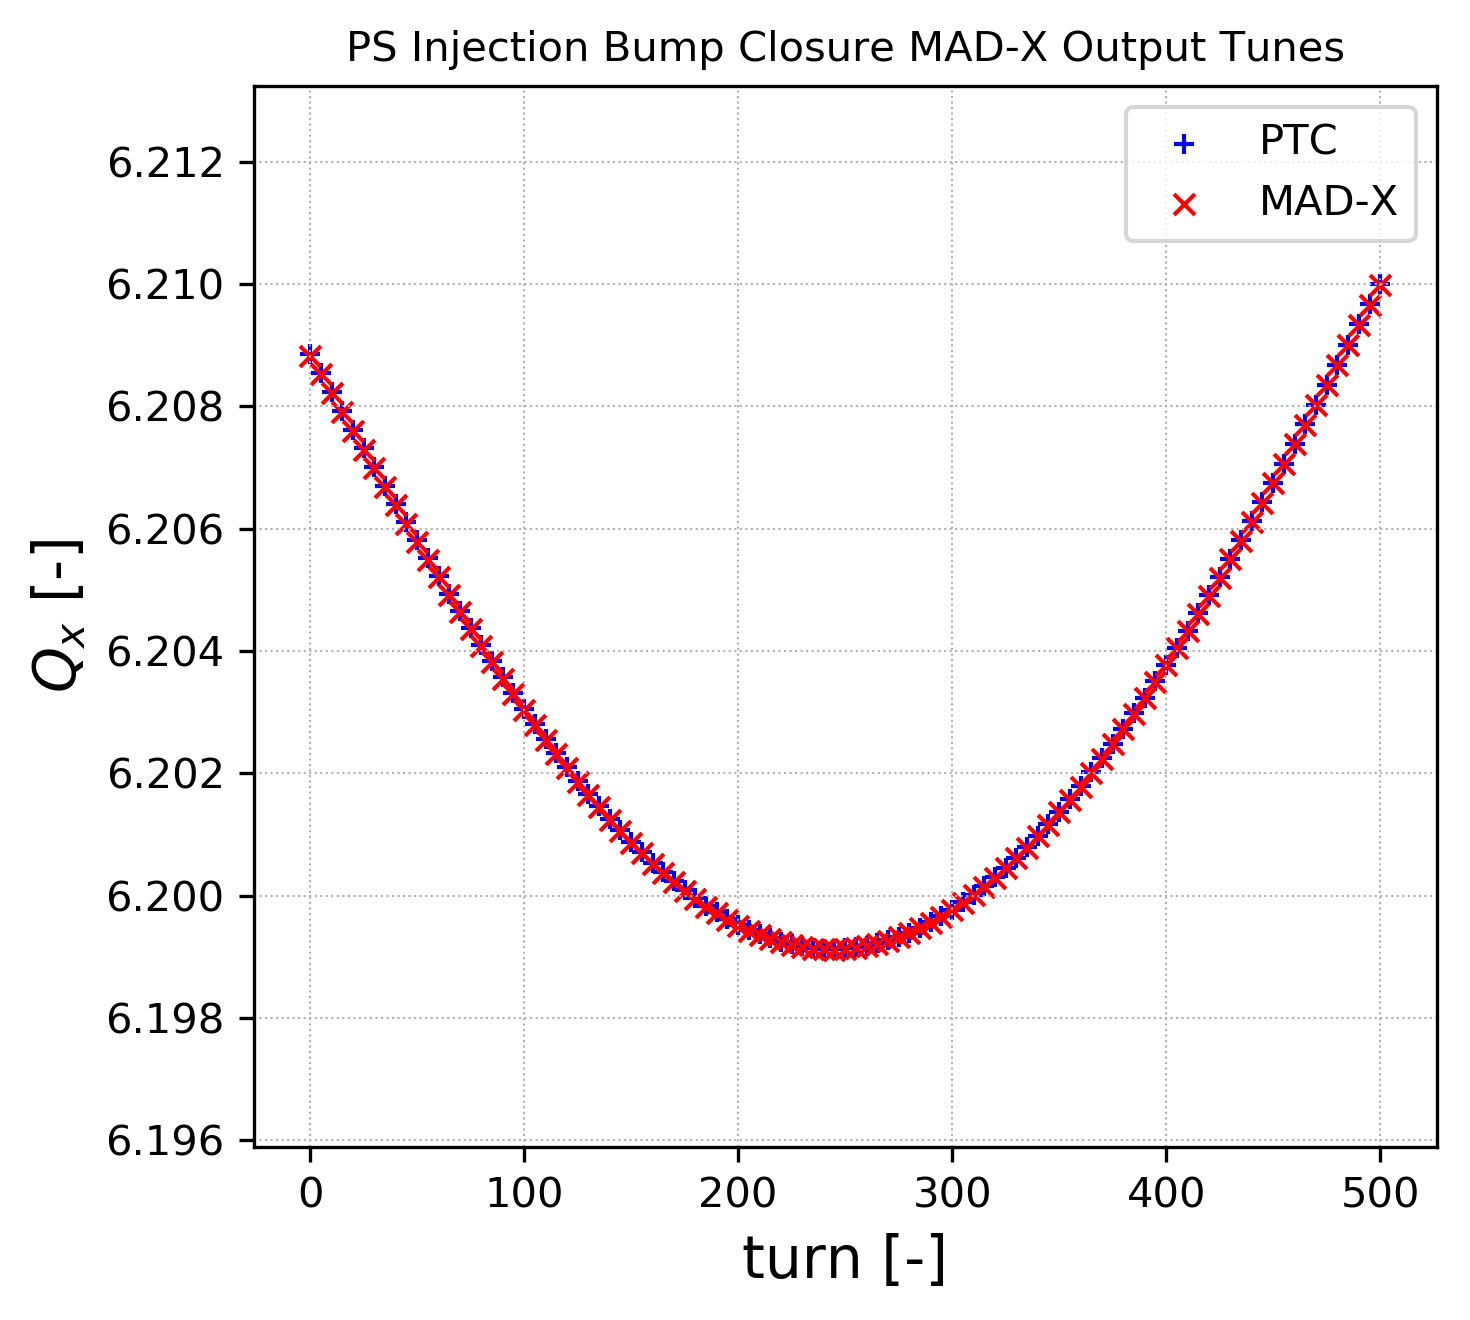

In [19]:
fig, ax1 = plt.subplots();
ax1.set_title('PS Injection Bump Closure MAD-X Output Tunes')
savename = save_folder + 'MADX_QX_Half.png'

PTC_qx = np.array(HTUNES['QX0'])

ax1.scatter(HTUNES['BSEXT_T'], PTC_qx+6., label='PTC', color='b', marker = '+');
ax1.scatter(HTUNES['BSEXT_T'], HTUNES['QX'], label='MAD-X', color='r', marker = 'x');

ax1.set_xlabel('turn [-]')
ax1.set_ylabel(r'$Q_{x}$ [-]')

ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

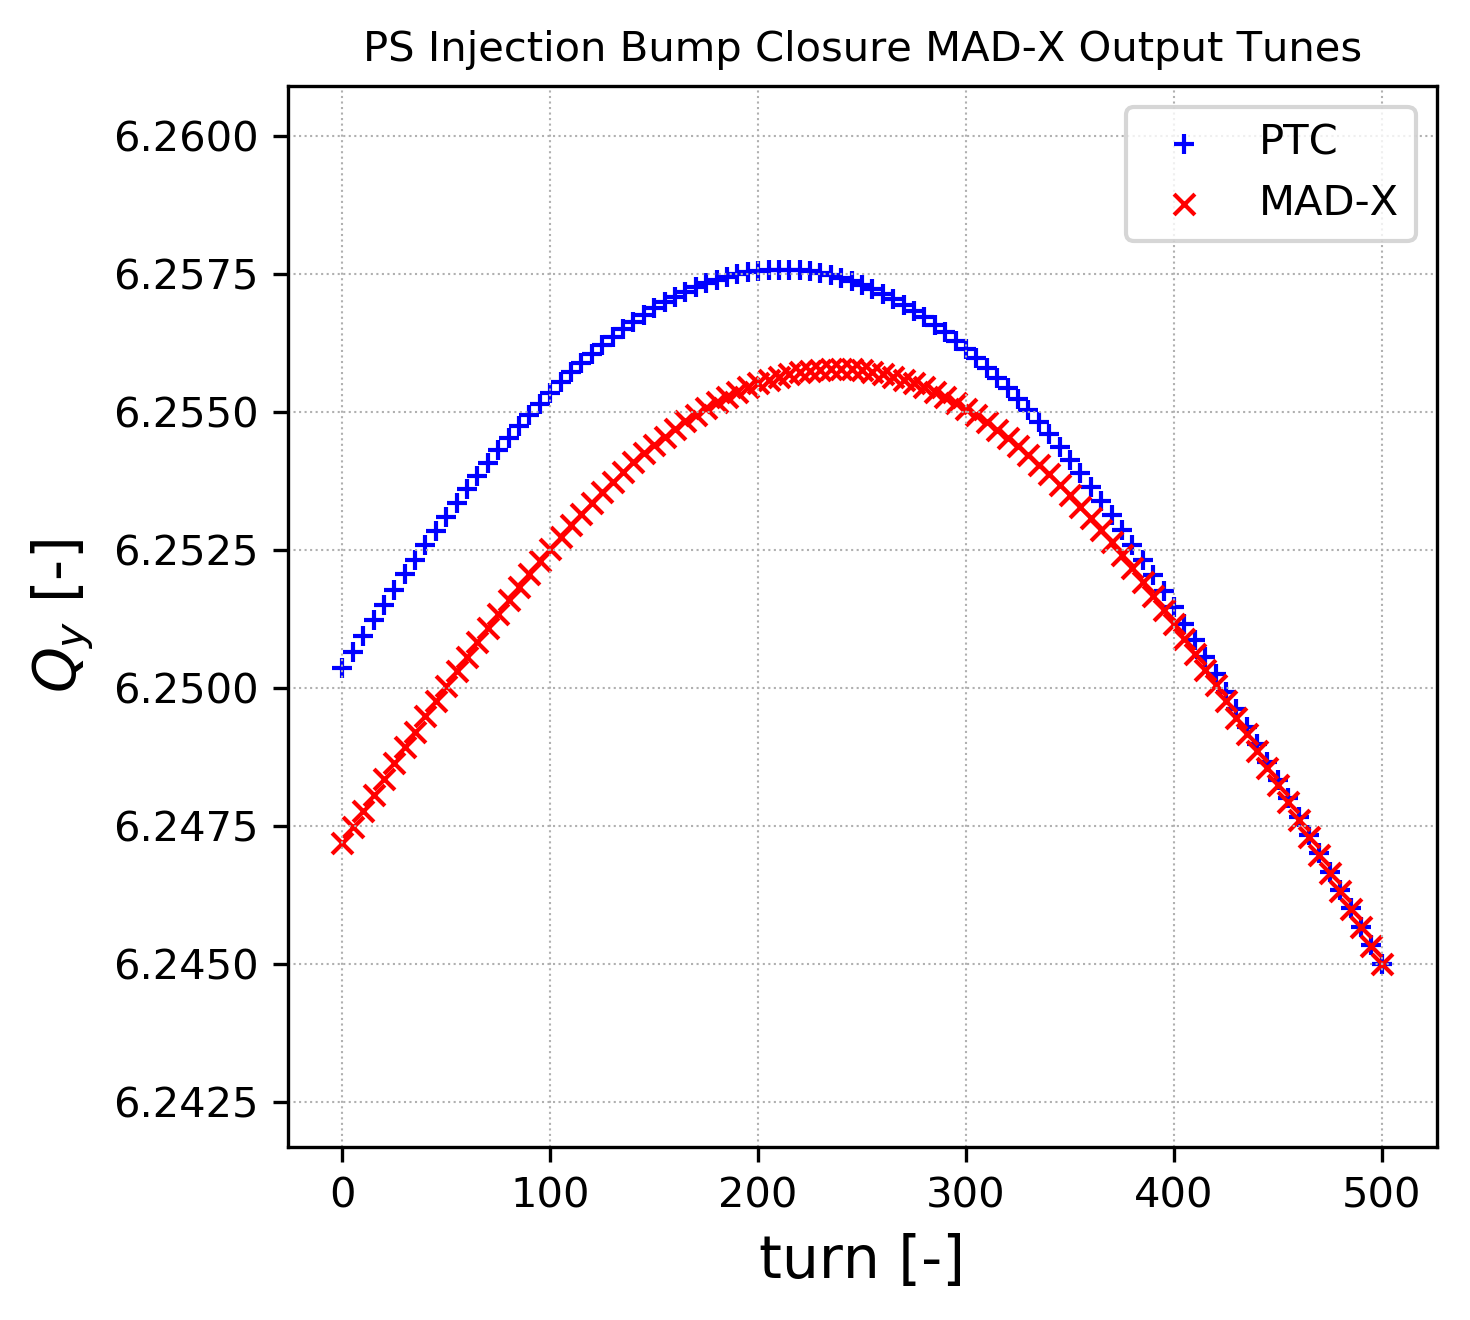

In [20]:
fig, ax1 = plt.subplots();
ax1.set_title('PS Injection Bump Closure MAD-X Output Tunes')
savename = save_folder + 'MADX_QY_Half.png'

PTC_qy = np.array(HTUNES['QY0'])

ax1.scatter(HTUNES['BSEXT_T'], PTC_qy+6., label='PTC', color='b', marker = '+');
ax1.scatter(HTUNES['BSEXT_T'], HTUNES['QY'], label='MAD-X', color='r', marker = 'x');

ax1.set_xlabel('turn [-]')
ax1.set_ylabel(r'$Q_{y}$ [-]')

ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

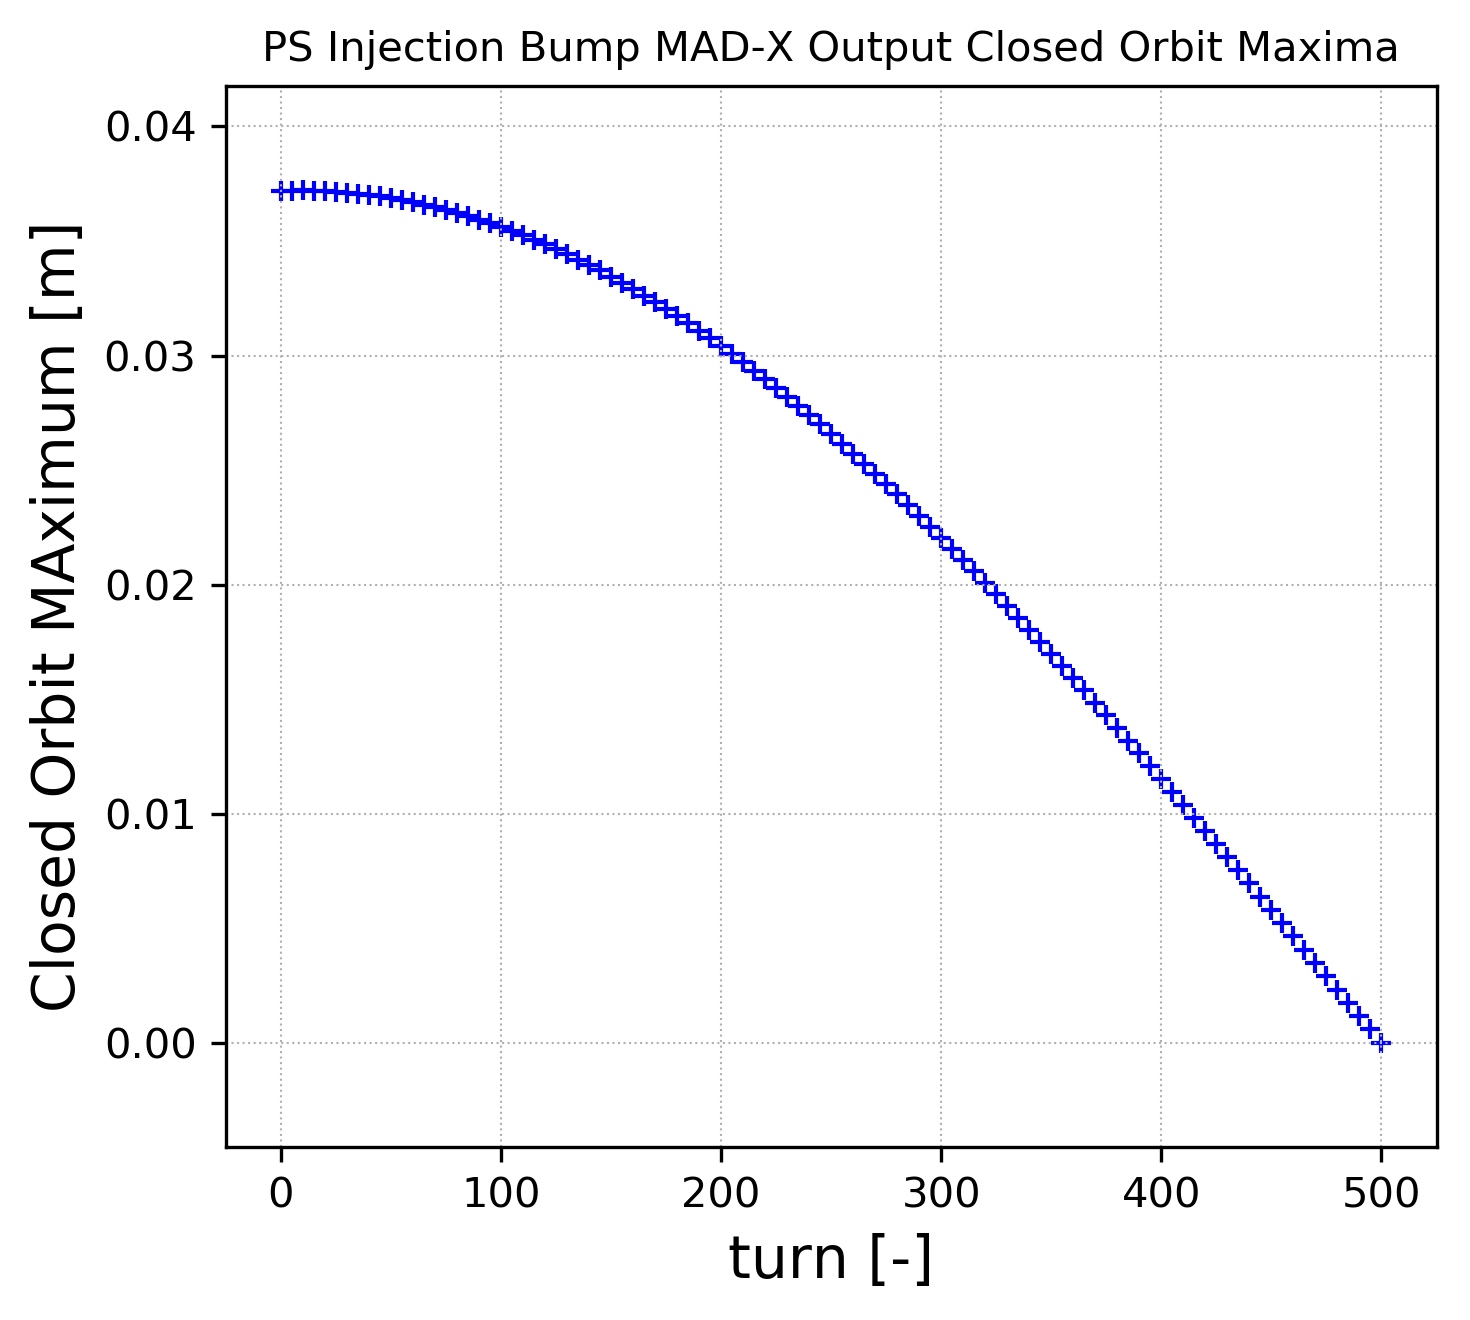

In [21]:
fig, ax1 = plt.subplots();
ax1.set_title('PS Injection Bump MAD-X Output Closed Orbit Maxima')
savename = save_folder + 'MADX_COMax_Half.png'

ax1.scatter(HTUNES['BSEXT_T'], HTUNES['XMAX'], color='b', marker = '+');

ax1.set_xlabel('turn [-]')
ax1.set_ylabel('Closed Orbit MAximum [m]')

#ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

# Load and check PyORBIT bump 

In [94]:
def add_PyORBIT_output_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p
	print ('\tAdded output data from ', filename, '\t dictionary key: ', label)
	return dd

In [95]:
dd = dict()

dd = add_PyORBIT_output_file(dd, '../13_Full_Bump/PyORBIT/output/output.mat', 'PyORBIT Full')

('\tAdded output data from ', '../13_Full_Bump/PyORBIT/output/output.mat', '\t dictionary key: ', 'PyORBIT Full')


In [96]:
dd1 = dict()

dd1 = add_PyORBIT_output_file(dd1, '../12_Half_Bump/PyORBIT/output/output.mat', 'PyORBIT Half')

('\tAdded output data from ', '../12_Half_Bump/PyORBIT/output/output.mat', '\t dictionary key: ', 'PyORBIT Half')


In [97]:
dd['PyORBIT Full'].keys()

['eps_z',
 'D_x',
 'D_y',
 'kurtosis_yp_6sig',
 'kurtosis_yp',
 'mu_yp',
 'kurtosis_z_6sig',
 'eff_beta_y',
 'eff_beta_x',
 'eff_alpha_y',
 'kurtosis_y_6sig',
 'epsn_y',
 'epsn_x',
 'beta_y',
 'beta_x',
 'dpp_rms',
 'sig_yp',
 'min_dE',
 'orbit_x_max',
 'turn_time',
 'n_mp',
 'min_xp',
 'orbit_x_min',
 'kurtosis_y',
 'kurtosis_xp_6sig',
 'alpha_x',
 'alpha_y',
 'bunchlength',
 '__header__',
 'sig_xp',
 'kurtosis_dE_6sig',
 'kurtosis_xp',
 'max_xp',
 'intensity',
 'min_yp',
 'sig_dE',
 'min_x',
 'mu_z',
 'min_z',
 'mu_x',
 'cumulative_time',
 'mean_yp',
 'Qy',
 'eff_epsn_y',
 'eff_epsn_x',
 'mean_x',
 'mean_y',
 'mean_z',
 'kurtosis_x_6sig',
 '__version__',
 'max_z',
 'mu_dE',
 'max_x',
 'max_y',
 'mean_dE',
 'Qx',
 'sig_z',
 'sig_y',
 'sig_x',
 'max_yp',
 'kurtosis_z',
 'eff_alpha_x',
 'kurtosis_x',
 'mu_xp',
 'turn_duration',
 'min_y',
 'mean_xp',
 'mu_y',
 'kurtosis_dE',
 'orbit_y_max',
 'orbit_y_min',
 '__globals__',
 'turn',
 'max_dE',
 'gamma']

('PyORBIT Half', 'Average ', 'Qx', ' = ', '0.2095', ' range = ', 0.01099, ' = ', 5.2459999999999996, '%')


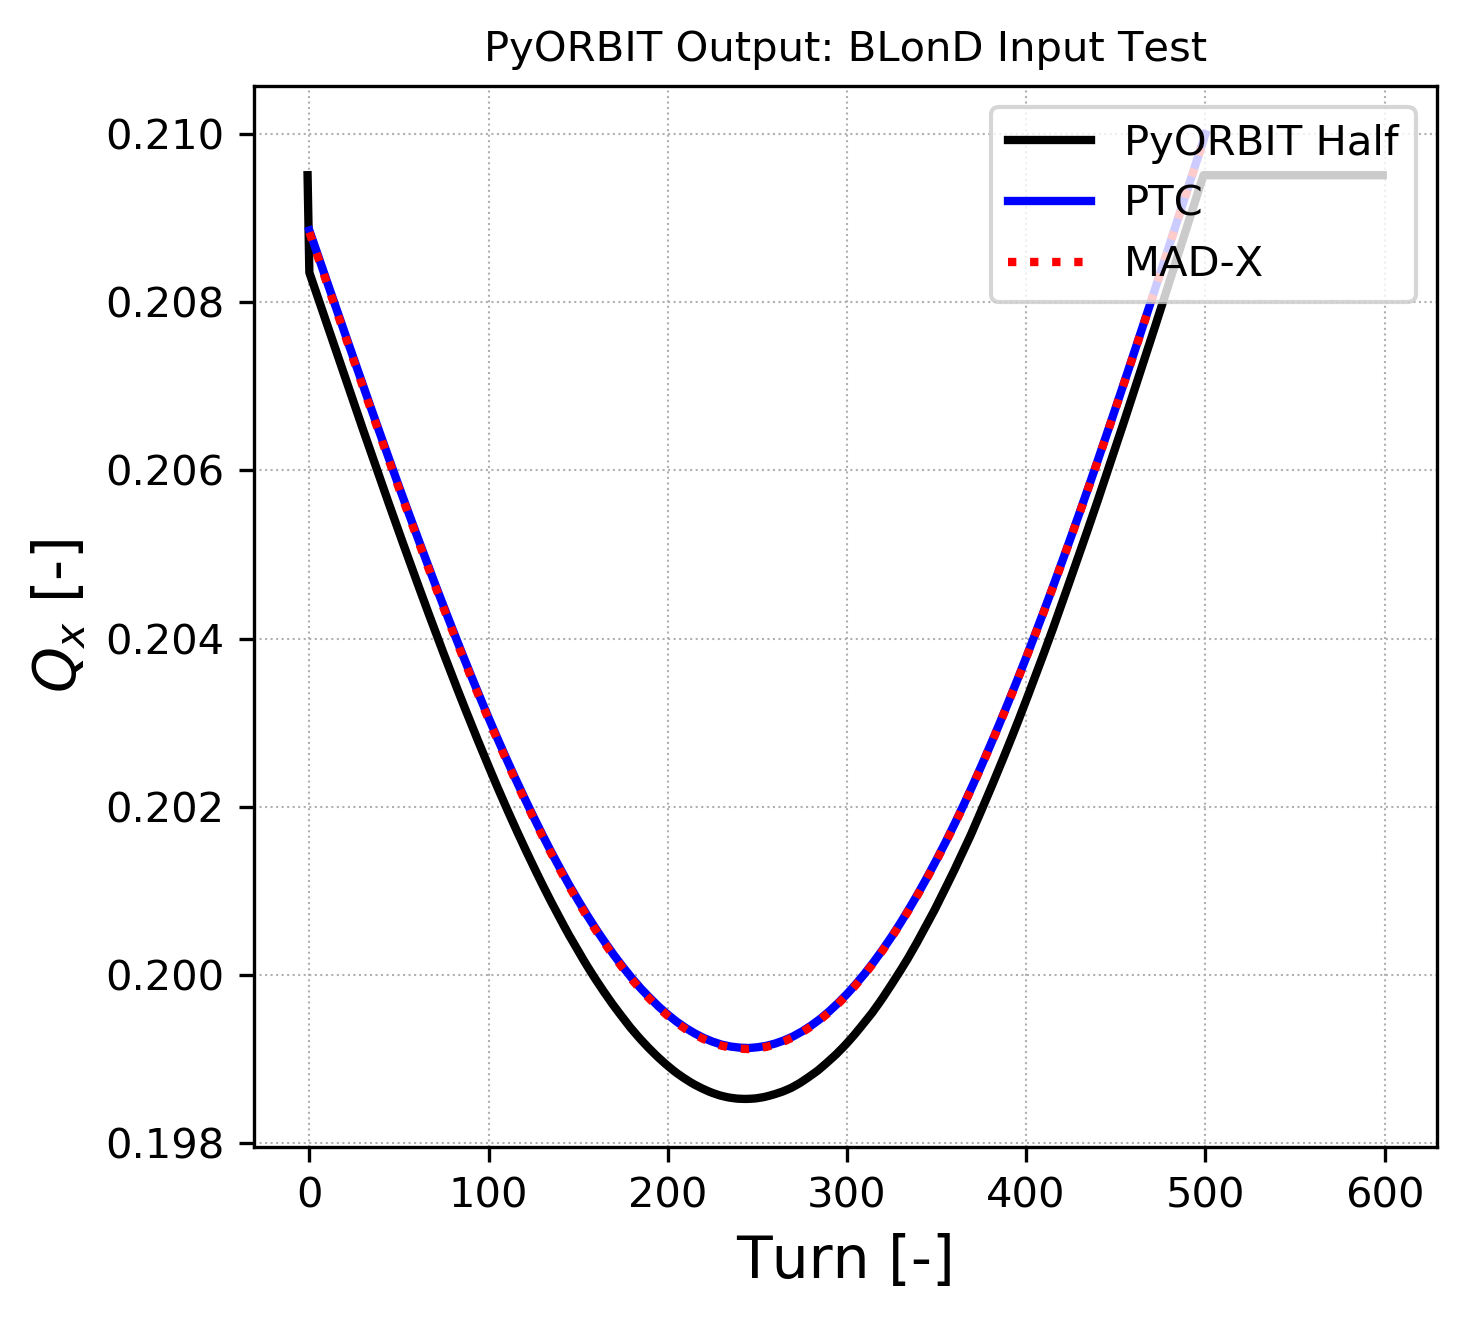

In [106]:
parameter1 = 'Qx'
multi1 = 1

fig, ax1 = plt.subplots();
ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder + parameter1 + '_Half.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel('$Q_x$ [-]')


colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key in dd1:

    ax1.plot(dd1[key]['turn'][0], dd1[key][parameter1][0]*multi1, color='k', label=key, lw='2');
    av_ = np.mean(dd1[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd1[key][parameter1][0]*multi1) - np.min(dd1[key][parameter1][0]*multi1))
    print( key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'   )
    c_it = c_it + 1;
    
PTC_qx = np.array(HTUNES['QX0'])
MADX_qx = np.array(HTUNES['QX'])-6

ax1.plot(HTUNES['BSEXT_T'], PTC_qx, label='PTC', color='b', lw=2);
ax1.plot(HTUNES['BSEXT_T'], MADX_qx, label='MAD-X', color='r', ls=':', lw=2);

ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

('PyORBIT Half', 'Average ', 'Qy', ' = ', '0.2451', ' range = ', 0.01275, ' = ', 5.2, '%')


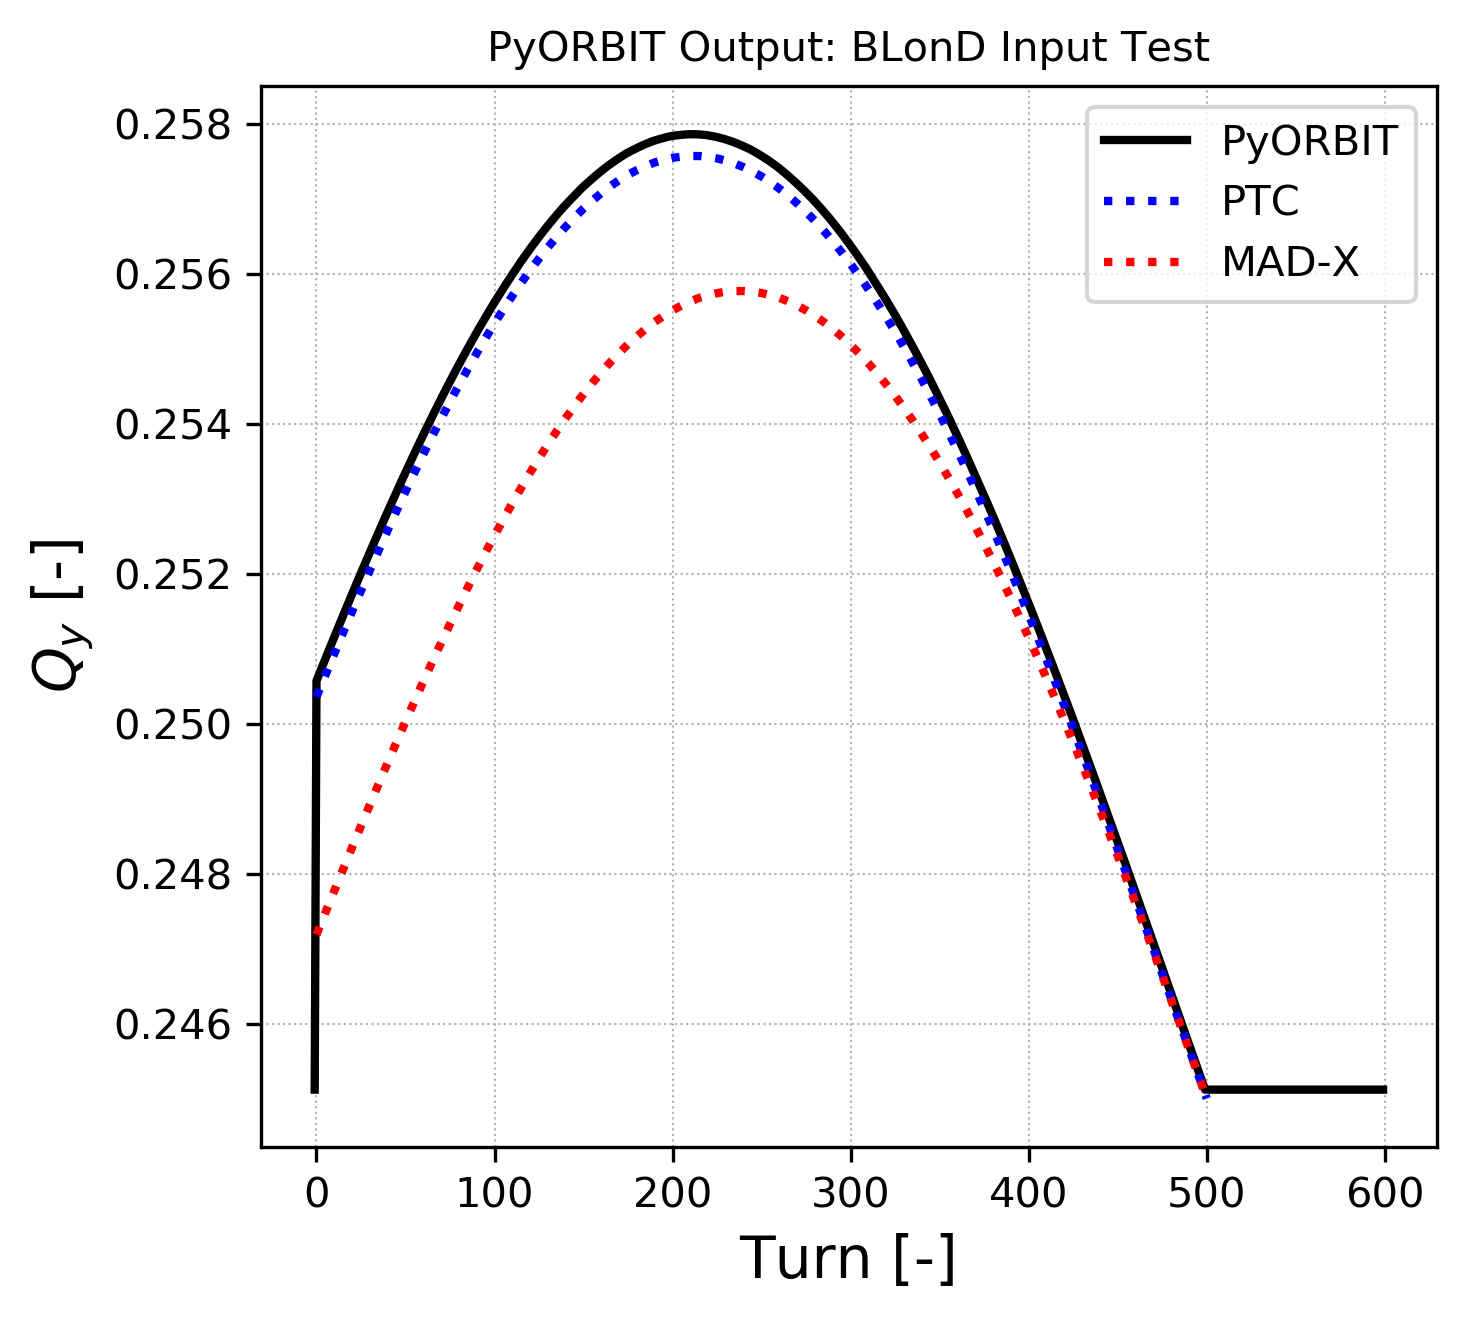

In [107]:
parameter1 = 'Qy'
multi1 = 1

fig, ax1 = plt.subplots();
ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder + parameter1 + '_Half.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel('$Q_y$ [-]')


colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key in dd1:

    ax1.plot(dd1[key]['turn'][0], dd1[key][parameter1][0]*multi1, color='k', label='PyORBIT', lw='2');
    av_ = np.mean(dd1[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd1[key][parameter1][0]*multi1) - np.min(dd1[key][parameter1][0]*multi1))
    print( key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'   )
    c_it = c_it + 1;
    
PTC_qx = np.array(HTUNES['QY0'])
MADX_qx = np.array(HTUNES['QY'])-6

ax1.plot(HTUNES['BSEXT_T'], PTC_qx, label='PTC', color='b', ls=':', lw=2);
ax1.plot(HTUNES['BSEXT_T'], MADX_qx, label='MAD-X', color='r', ls=':', lw=2);

ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

('PyORBIT Full', 'Average ', 'Qx', ' = ', '0.2083', ' range = ', 0.01595, ' = ', 7.656000000000001, '%')


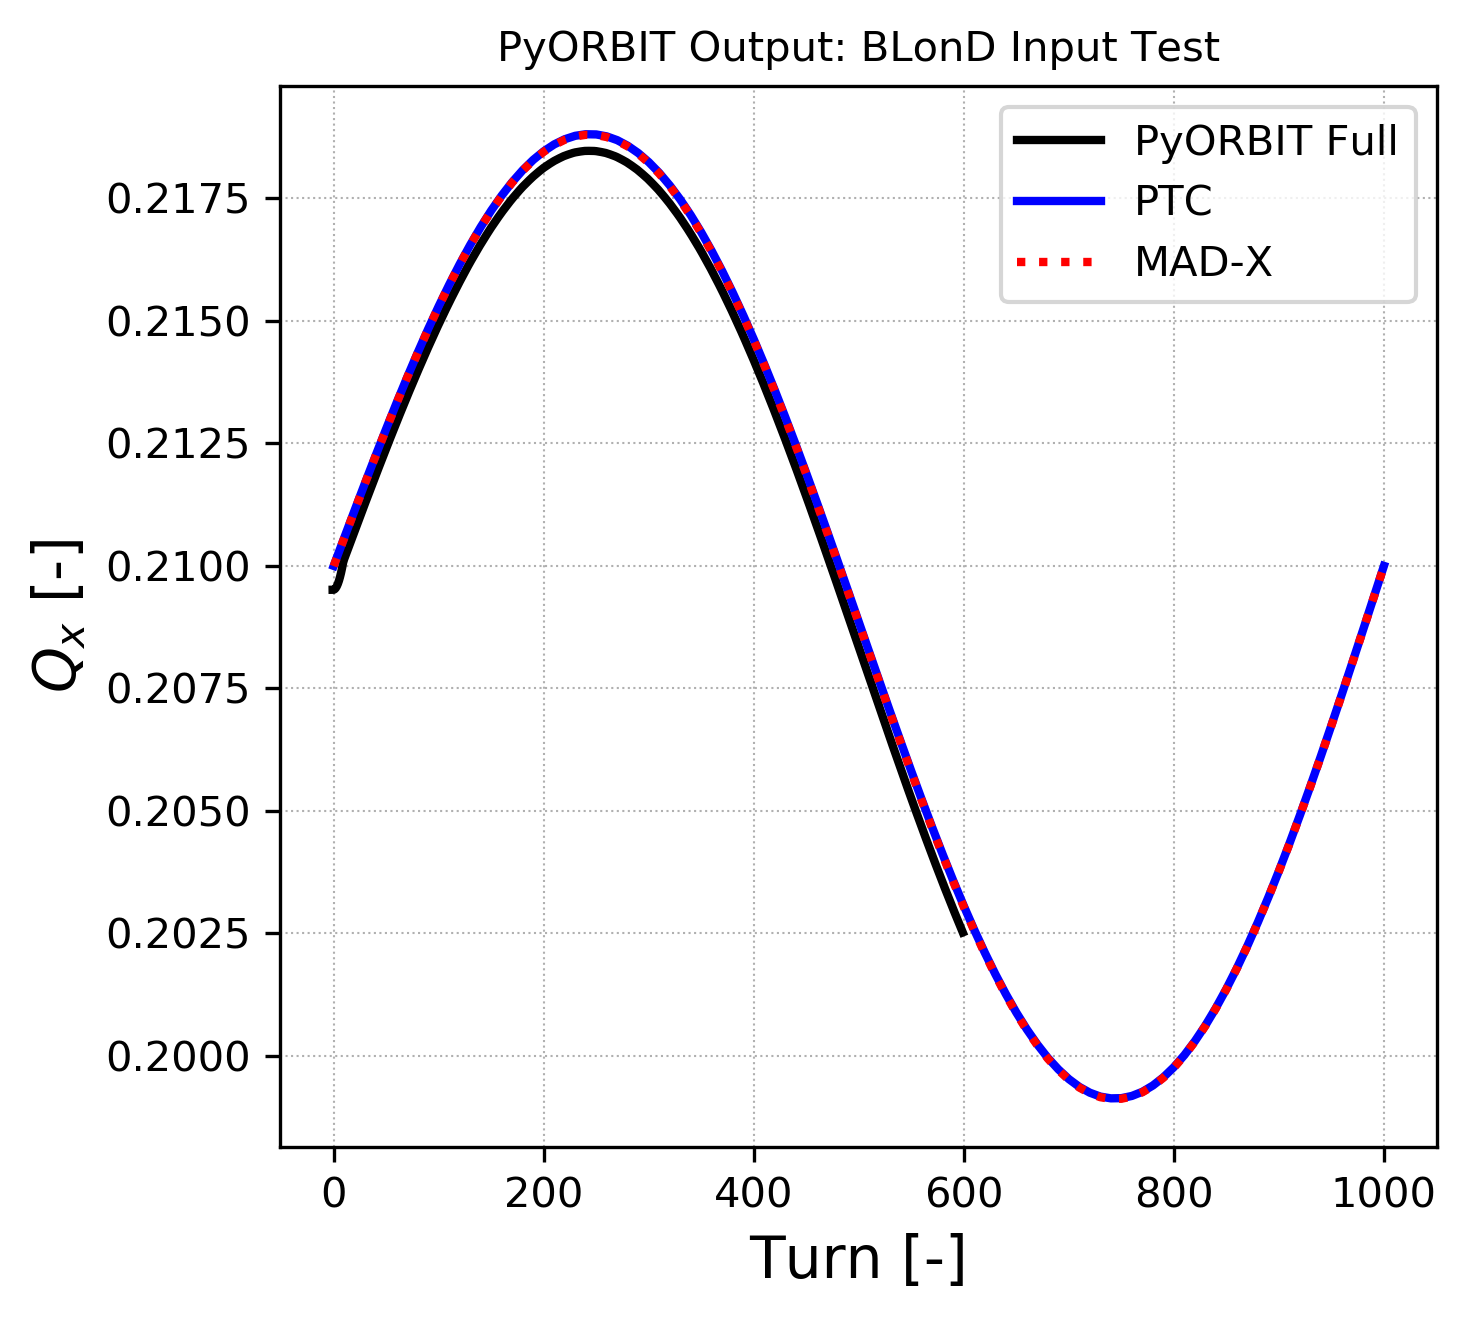

In [108]:
parameter1 = 'Qx'
multi1 = 1

fig, ax1 = plt.subplots();
ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder + parameter1 + '_Full.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel('$Q_x$ [-]')


colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key in dd:

    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color='k', label=key, lw='2');
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    print( key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'   )
    c_it = c_it + 1;
    
PTC_qx = np.array(TUNES['QX0'])
MADX_qx = np.array(TUNES['QX'])-6

ax1.plot(TUNES['BSEXT_T'], PTC_qx, label='PTC', color='b', lw=2);
ax1.plot(TUNES['BSEXT_T'], MADX_qx, label='MAD-X', color='r', ls=':', lw=2);

ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

('PyORBIT Full', 'Average ', 'Qy', ' = ', '0.2506', ' range = ', 0.01727, ' = ', 6.891, '%')


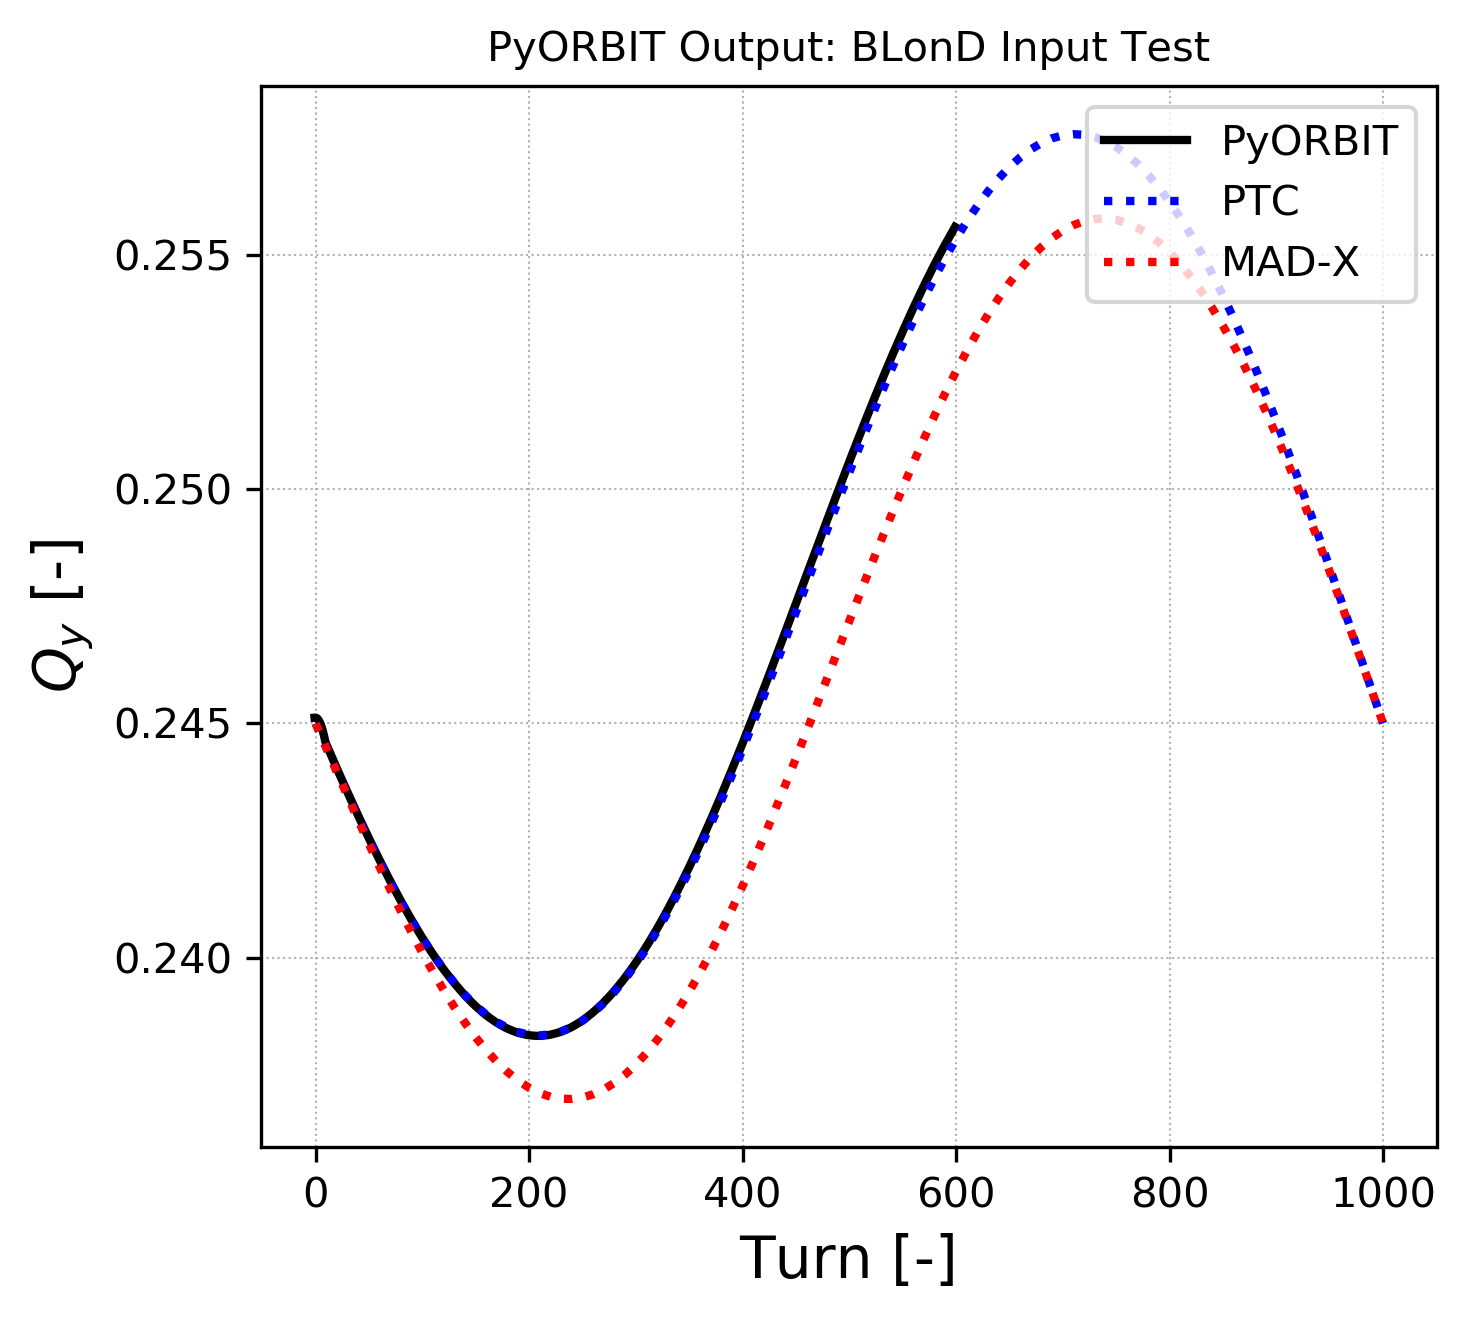

In [109]:
parameter1 = 'Qy'
multi1 = 1

fig, ax1 = plt.subplots();
ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder + parameter1 + '_Full.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel('$Q_y$ [-]')


colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key in dd:

    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color='k', label='PyORBIT', lw='2');
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    print( key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'   )
    c_it = c_it + 1;
    
PTC_qx = np.array(TUNES['QY0'])
MADX_qx = np.array(TUNES['QY'])-6

ax1.plot(TUNES['BSEXT_T'], PTC_qx, label='PTC', color='b', ls=':', lw=2);
ax1.plot(TUNES['BSEXT_T'], MADX_qx, label='MAD-X', color='r', ls=':', lw=2);

ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)